# Example: WeightedSHAP on the fraud dataset

- In this notebook, we introduce a generalized feature attribution method **weightedSHAP**.

In [1]:
import sys, os
import numpy as np
import pickle 
np.random.seed(2022)
sys.path.append('../')
import weightedSHAP

## Load data
- We use the fraud dataset (https://www.openml.org/search?type=data&status=active&id=42397).
- A function `weightedSHAP.load_data` will load the `train`, `val`, `est`, and `test` datasets. 
 - `train`: to train a model to explain
 - `val`: to optimize hyperparameters
 - `est`: to estimate coalition functions
 - `test`: to evaluate the quality of feature attributions 

In [2]:
# Load dataset
dir_path='./'
problem='classification' 
dataset='fraud'
ML_model='boosting' 
(X_train, y_train), (X_val, y_val), (X_est, y_est), (X_test, y_test)=weightedSHAP.load_data(problem, dataset, dir_path)    


------------------------------
Load a dataset
------------------------------
--------------------------------------------------
Fraud Detection
--------------------------------------------------
------------------------------
Before adding noise
Shape of X_train, X_val, X_est, X_test: (13310, 30), (1902, 30), (1902, 30), (1902, 30)
------------------------------
Rho: 0.0388
After adding noise
Shape of X_train, X_val, X_est, X_test: (13310, 90), (1902, 90), (1902, 90), (1902, 90)
------------------------------


## Train a model to explain
 - This step is a typical routine in machine learning. Given training and validation datasets, we train a model. Our goal is to interpret this model by looking a particular prediction (i.e., a local attribution problem).

In [3]:
# train a baseline model
model_to_explain=weightedSHAP.create_model_to_explain(X_train, y_train, X_val, y_val, problem, ML_model)

------------------------------
Train a model
Train a model to explain: Boosting
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.646885	valid_0's binary_error: 0.0320715
Elapsed time for training a model to explain: 0.53 seconds
------------------------------


## Compute WeightedSHAP 
- `weightedSHAP.generate_coalition_function` creates a conditional coalition function that computes conditional expectation values $\mathbb{E}[f(X) \mid X_S = x_S]$.
- `weightedSHAP.compute_attributions` computes WeightedSHAP 
 \begin{align*}
    \phi_{\mathrm{WeightedSHAP}}(\mathcal{T}, \mathcal{W}) := \phi_{\mathbf{w}^* (\mathcal{T}, \mathcal{W})},
 \end{align*} 
  where $\mathbf{w}^* (\mathcal{T}, \mathcal{W}) := \mathrm{argmax}_{\mathbf{w} \in \mathcal{W}} \mathcal{T} (\phi_{\mathbf{w}})$. By default, a set $\mathcal{W}$ includes SHAP and $\mathcal{T}$ is the negative area under the prediction recovery error curve (AUP, Equation (4) of the paper).

In [4]:
%%time
if not os.path.exists(f'{dir_path}/fraud_example.pickle'):
    # Generate a conditional coalition function
    conditional_extension=weightedSHAP.generate_coalition_function(model_to_explain, X_train, X_est, problem, ML_model)
    
    # With the conditional coalition function, we compute attributions
    exp_dict=weightedSHAP.compute_attributions(problem, ML_model,
                                                 model_to_explain, conditional_extension,
                                                 X_train, y_train,
                                                 X_val, y_val, 
                                                 X_test, y_test)

    with open(f'{dir_path}/fraud_example.pickle', 'wb') as handle:
        pickle.dump(exp_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(f'{dir_path}/fraud_example.pickle', 'rb') as handle:
        exp_dict = pickle.load(handle)


Elapsed time for training a surrogate model: 293.12 seconds


  0%|                                                                                                                | 0/100 [00:00<?, ?it/s]

Total number of random sets: 200, GR_stat: 1.0849638079833122
Total number of random sets: 300, GR_stat: 1.0266011693579467
Total number of random sets: 400, GR_stat: 1.019406835060561
Total number of random sets: 500, GR_stat: 1.0144173368531912
Total number of random sets: 600, GR_stat: 1.0098584520345955
Total number of random sets: 700, GR_stat: 1.0083459923116076
Total number of random sets: 800, GR_stat: 1.0068965919301647
Total number of random sets: 900, GR_stat: 1.0041941707407975
Therehosld: 8991
We have seen 1000 random subsets for each feature.


  1%|█                                                                                                       | 1/100 [00:10<18:03, 10.95s/it]

Total number of random sets: 200, GR_stat: 1.0300265469592411
Total number of random sets: 300, GR_stat: 1.0214152098249112
Total number of random sets: 400, GR_stat: 1.017614183771613
Total number of random sets: 500, GR_stat: 1.0223497351104989
Total number of random sets: 600, GR_stat: 1.016632954374027
Total number of random sets: 700, GR_stat: 1.0116764309028885
Total number of random sets: 800, GR_stat: 1.0091787271995212
Total number of random sets: 900, GR_stat: 1.0065439349615792
Total number of random sets: 1000, GR_stat: 1.008881444627746
Total number of random sets: 1100, GR_stat: 1.007117557250145
Total number of random sets: 1200, GR_stat: 1.006991523954771
Total number of random sets: 1300, GR_stat: 1.0057853518862097
Total number of random sets: 1400, GR_stat: 1.00722117765096
Total number of random sets: 1500, GR_stat: 1.0066207531111393
Total number of random sets: 1600, GR_stat: 1.0036375759158438
Therehosld: 8991
We have seen 1700 random subsets for each feature.


  2%|██                                                                                                      | 2/100 [00:30<25:45, 15.77s/it]

Total number of random sets: 200, GR_stat: 1.0330201245560617
Total number of random sets: 300, GR_stat: 1.0255853713502312
Total number of random sets: 400, GR_stat: 1.0203404385872095
Total number of random sets: 500, GR_stat: 1.0143619196009244
Total number of random sets: 600, GR_stat: 1.012240260221126
Total number of random sets: 700, GR_stat: 1.0100881432416742
Total number of random sets: 800, GR_stat: 1.0099043763144457
Total number of random sets: 900, GR_stat: 1.0109569337660782
Total number of random sets: 1000, GR_stat: 1.008920420973148
Total number of random sets: 1100, GR_stat: 1.0083601690784045
Total number of random sets: 1200, GR_stat: 1.0060426662355133
Total number of random sets: 1300, GR_stat: 1.004211416313171
Therehosld: 8991
We have seen 1400 random subsets for each feature.


  3%|███                                                                                                     | 3/100 [00:45<25:25, 15.73s/it]

Total number of random sets: 200, GR_stat: 1.0381904659526537
Total number of random sets: 300, GR_stat: 1.0267001458333354
Total number of random sets: 400, GR_stat: 1.027435124014517
Total number of random sets: 500, GR_stat: 1.0282110489438825
Total number of random sets: 600, GR_stat: 1.0138997273840138
Total number of random sets: 700, GR_stat: 1.0173036242313584
Total number of random sets: 800, GR_stat: 1.0180653423764041
Total number of random sets: 900, GR_stat: 1.0105655890504661
Total number of random sets: 1000, GR_stat: 1.0076977002927778
Total number of random sets: 1100, GR_stat: 1.009928963245134
Total number of random sets: 1200, GR_stat: 1.0068058007445402
Total number of random sets: 1300, GR_stat: 1.0059182696737643
Total number of random sets: 1400, GR_stat: 1.0073837021433194
Total number of random sets: 1500, GR_stat: 1.0055403851153915
Total number of random sets: 1600, GR_stat: 1.004625237177519
Therehosld: 8991
We have seen 1700 random subsets for each feature

  4%|████▏                                                                                                   | 4/100 [01:05<27:23, 17.12s/it]

Total number of random sets: 200, GR_stat: 1.039534350926342
Total number of random sets: 300, GR_stat: 1.0297032116574174
Total number of random sets: 400, GR_stat: 1.0160773467367168
Total number of random sets: 500, GR_stat: 1.0105146505047704
Total number of random sets: 600, GR_stat: 1.0108086283823032
Total number of random sets: 700, GR_stat: 1.0087046914134128
Total number of random sets: 800, GR_stat: 1.0072413230066541
Total number of random sets: 900, GR_stat: 1.0078985013223678
Total number of random sets: 1000, GR_stat: 1.0060371247230593
Total number of random sets: 1100, GR_stat: 1.0060488939518484
Total number of random sets: 1200, GR_stat: 1.0054246056747984
Total number of random sets: 1300, GR_stat: 1.004585836351337
Therehosld: 8991
We have seen 1400 random subsets for each feature.


  5%|█████▏                                                                                                  | 5/100 [01:20<26:16, 16.59s/it]

Total number of random sets: 200, GR_stat: 1.0356652737628567
Total number of random sets: 300, GR_stat: 1.0269488407054044
Total number of random sets: 400, GR_stat: 1.0201806686313524
Total number of random sets: 500, GR_stat: 1.0169813942075543
Total number of random sets: 600, GR_stat: 1.0134373566459243
Total number of random sets: 700, GR_stat: 1.0160538840617217
Total number of random sets: 800, GR_stat: 1.0086643925020151
Total number of random sets: 900, GR_stat: 1.0078128885696074
Total number of random sets: 1000, GR_stat: 1.006867611309011
Total number of random sets: 1100, GR_stat: 1.007711806294734
Total number of random sets: 1200, GR_stat: 1.009086669600752
Total number of random sets: 1300, GR_stat: 1.0066277309017648
Total number of random sets: 1400, GR_stat: 1.006054801635959
Total number of random sets: 1500, GR_stat: 1.0051012089858684
Total number of random sets: 1600, GR_stat: 1.0052545724973185
Total number of random sets: 1700, GR_stat: 1.004018325544387
There

  6%|██████▏                                                                                                 | 6/100 [01:41<28:01, 17.89s/it]

Total number of random sets: 200, GR_stat: 1.0529960169812598
Total number of random sets: 300, GR_stat: 1.0270798040094684
Total number of random sets: 400, GR_stat: 1.0173151369037123
Total number of random sets: 500, GR_stat: 1.0108165737584969
Total number of random sets: 600, GR_stat: 1.013879480874948
Total number of random sets: 700, GR_stat: 1.0105848285614605
Total number of random sets: 800, GR_stat: 1.0088764988648713
Total number of random sets: 900, GR_stat: 1.008783072492473
Total number of random sets: 1000, GR_stat: 1.0066783332330942
Total number of random sets: 1100, GR_stat: 1.0045205473088288
Therehosld: 8991
We have seen 1200 random subsets for each feature.


  7%|███████▎                                                                                                | 7/100 [01:54<25:26, 16.41s/it]

Total number of random sets: 200, GR_stat: 1.0385117793931664
Total number of random sets: 300, GR_stat: 1.0206161202654096
Total number of random sets: 400, GR_stat: 1.0337745892052252
Total number of random sets: 500, GR_stat: 1.0118762391666674
Total number of random sets: 600, GR_stat: 1.0128168087931242
Total number of random sets: 700, GR_stat: 1.0072706824349889
Total number of random sets: 800, GR_stat: 1.0136414734228845
Total number of random sets: 900, GR_stat: 1.0073788831283037
Total number of random sets: 1000, GR_stat: 1.0058534868889433
Total number of random sets: 1100, GR_stat: 1.0088068797201102
Total number of random sets: 1200, GR_stat: 1.0058499995561434
Total number of random sets: 1300, GR_stat: 1.0061737137635671
Total number of random sets: 1400, GR_stat: 1.0054259523874758
Total number of random sets: 1500, GR_stat: 1.0046408456400917
Therehosld: 8991
We have seen 1600 random subsets for each feature.


  8%|████████▎                                                                                               | 8/100 [02:12<25:56, 16.92s/it]

Total number of random sets: 200, GR_stat: 1.0364343628253
Total number of random sets: 300, GR_stat: 1.0232827299283518
Total number of random sets: 400, GR_stat: 1.0129185108395253
Total number of random sets: 500, GR_stat: 1.0205106676643452
Total number of random sets: 600, GR_stat: 1.0136690508776496
Total number of random sets: 700, GR_stat: 1.0084061187071311
Total number of random sets: 800, GR_stat: 1.007975915047365
Total number of random sets: 900, GR_stat: 1.0077826374512713
Total number of random sets: 1000, GR_stat: 1.0043300693351984
Therehosld: 8991
We have seen 1100 random subsets for each feature.


  9%|█████████▎                                                                                              | 9/100 [02:24<23:22, 15.41s/it]

Total number of random sets: 200, GR_stat: 1.0287892427438563
Total number of random sets: 300, GR_stat: 1.0186749264433563
Total number of random sets: 400, GR_stat: 1.0169136444612965
Total number of random sets: 500, GR_stat: 1.0164675062807693
Total number of random sets: 600, GR_stat: 1.0171238647417868
Total number of random sets: 700, GR_stat: 1.0128167410755768
Total number of random sets: 800, GR_stat: 1.012071482917969
Total number of random sets: 900, GR_stat: 1.010245478702619
Total number of random sets: 1000, GR_stat: 1.0080539149649228
Total number of random sets: 1100, GR_stat: 1.0065943773041437
Total number of random sets: 1200, GR_stat: 1.0079990815031157
Total number of random sets: 1300, GR_stat: 1.0065311272977149
Total number of random sets: 1400, GR_stat: 1.0070042197518
Total number of random sets: 1500, GR_stat: 1.0052502543872597
Total number of random sets: 1600, GR_stat: 1.0049922897060912
Therehosld: 8991
We have seen 1700 random subsets for each feature.


 10%|██████████▎                                                                                            | 10/100 [02:43<24:51, 16.57s/it]

Total number of random sets: 200, GR_stat: 1.0594788118258704
Total number of random sets: 300, GR_stat: 1.042195061595334
Total number of random sets: 400, GR_stat: 1.0197908926857306
Total number of random sets: 500, GR_stat: 1.014242195098613
Total number of random sets: 600, GR_stat: 1.0129847133065333
Total number of random sets: 700, GR_stat: 1.015625590981324
Total number of random sets: 800, GR_stat: 1.0100376507601925
Total number of random sets: 900, GR_stat: 1.0093223815909103
Total number of random sets: 1000, GR_stat: 1.0081573336378402
Total number of random sets: 1100, GR_stat: 1.0050438836850182
Total number of random sets: 1200, GR_stat: 1.007302320593781
Total number of random sets: 1300, GR_stat: 1.0048298832158769
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 11%|███████████▎                                                                                           | 11/100 [02:59<24:08, 16.28s/it]

Total number of random sets: 200, GR_stat: 1.0426695842516005
Total number of random sets: 300, GR_stat: 1.0221423594236847
Total number of random sets: 400, GR_stat: 1.0188179409005451
Total number of random sets: 500, GR_stat: 1.0168112987223692
Total number of random sets: 600, GR_stat: 1.0159757421709865
Total number of random sets: 700, GR_stat: 1.0183724259942568
Total number of random sets: 800, GR_stat: 1.01156712475477
Total number of random sets: 900, GR_stat: 1.007718416271759
Total number of random sets: 1000, GR_stat: 1.0109691406661685
Total number of random sets: 1100, GR_stat: 1.0048494856516181
Therehosld: 8991
We have seen 1200 random subsets for each feature.


 12%|████████████▎                                                                                          | 12/100 [03:12<22:31, 15.36s/it]

Total number of random sets: 200, GR_stat: 1.0469340571776617
Total number of random sets: 300, GR_stat: 1.02512779486407
Total number of random sets: 400, GR_stat: 1.0204379584054726
Total number of random sets: 500, GR_stat: 1.0250588764382451
Total number of random sets: 600, GR_stat: 1.012375552836577
Total number of random sets: 700, GR_stat: 1.010612879731852
Total number of random sets: 800, GR_stat: 1.0101709514299082
Total number of random sets: 900, GR_stat: 1.0071259691979195
Total number of random sets: 1000, GR_stat: 1.0108937824246864
Total number of random sets: 1100, GR_stat: 1.0063236777512332
Total number of random sets: 1200, GR_stat: 1.0071123388961742
Total number of random sets: 1300, GR_stat: 1.0049375815978072
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 13%|█████████████▍                                                                                         | 13/100 [03:28<22:23, 15.44s/it]

Total number of random sets: 200, GR_stat: 1.0295157590034498
Total number of random sets: 300, GR_stat: 1.028804896391294
Total number of random sets: 400, GR_stat: 1.0314237342116308
Total number of random sets: 500, GR_stat: 1.0243275240056966
Total number of random sets: 600, GR_stat: 1.0123428600576014
Total number of random sets: 700, GR_stat: 1.010779964215688
Total number of random sets: 800, GR_stat: 1.0124377626961722
Total number of random sets: 900, GR_stat: 1.0146379077541068
Total number of random sets: 1000, GR_stat: 1.0084901105618531
Total number of random sets: 1100, GR_stat: 1.008723069481303
Total number of random sets: 1200, GR_stat: 1.0065151296201742
Total number of random sets: 1300, GR_stat: 1.004766413315866
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 14%|██████████████▍                                                                                        | 14/100 [03:43<22:12, 15.50s/it]

Total number of random sets: 200, GR_stat: 1.0283488842875097
Total number of random sets: 300, GR_stat: 1.0207336489558736
Total number of random sets: 400, GR_stat: 1.0155182290488822
Total number of random sets: 500, GR_stat: 1.01598519234901
Total number of random sets: 600, GR_stat: 1.0171948333372407
Total number of random sets: 700, GR_stat: 1.0090110845891345
Total number of random sets: 800, GR_stat: 1.0092864529772059
Total number of random sets: 900, GR_stat: 1.008807452452666
Total number of random sets: 1000, GR_stat: 1.0066049061617337
Total number of random sets: 1100, GR_stat: 1.0057670341998837
Total number of random sets: 1200, GR_stat: 1.0046090846600677
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 15%|███████████████▍                                                                                       | 15/100 [03:58<21:33, 15.21s/it]

Total number of random sets: 200, GR_stat: 1.061457966195357
Total number of random sets: 300, GR_stat: 1.0242502344518218
Total number of random sets: 400, GR_stat: 1.01815070591355
Total number of random sets: 500, GR_stat: 1.020301097035152
Total number of random sets: 600, GR_stat: 1.0097497075329571
Total number of random sets: 700, GR_stat: 1.0092667439735714
Total number of random sets: 800, GR_stat: 1.0096276509776945
Total number of random sets: 900, GR_stat: 1.0067661795266123
Total number of random sets: 1000, GR_stat: 1.0113831042342962
Total number of random sets: 1100, GR_stat: 1.005662533420884
Total number of random sets: 1200, GR_stat: 1.007376276205628
Total number of random sets: 1300, GR_stat: 1.0065217783562037
Total number of random sets: 1400, GR_stat: 1.0065168604466816
Total number of random sets: 1500, GR_stat: 1.0032076899278886
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 16%|████████████████▍                                                                                      | 16/100 [04:16<22:26, 16.02s/it]

Total number of random sets: 200, GR_stat: 1.0643597748418823
Total number of random sets: 300, GR_stat: 1.0226309523050525
Total number of random sets: 400, GR_stat: 1.0151220996464223
Total number of random sets: 500, GR_stat: 1.0101817679259208
Total number of random sets: 600, GR_stat: 1.0128523943201357
Total number of random sets: 700, GR_stat: 1.0098213156944849
Total number of random sets: 800, GR_stat: 1.0082036153995242
Total number of random sets: 900, GR_stat: 1.0076027492729576
Total number of random sets: 1000, GR_stat: 1.0074798433653493
Total number of random sets: 1100, GR_stat: 1.0062556109070633
Total number of random sets: 1200, GR_stat: 1.0048211057183296
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 17%|█████████████████▌                                                                                     | 17/100 [04:30<21:27, 15.52s/it]

Total number of random sets: 200, GR_stat: 1.0260679745552128
Total number of random sets: 300, GR_stat: 1.0183559757114131
Total number of random sets: 400, GR_stat: 1.0153951026169337
Total number of random sets: 500, GR_stat: 1.0094048019173492
Total number of random sets: 600, GR_stat: 1.0128000482911466
Total number of random sets: 700, GR_stat: 1.0097730376694591
Total number of random sets: 800, GR_stat: 1.0089624650103977
Total number of random sets: 900, GR_stat: 1.0089522545108687
Total number of random sets: 1000, GR_stat: 1.006403553940917
Total number of random sets: 1100, GR_stat: 1.0093770993637674
Total number of random sets: 1200, GR_stat: 1.005867920130762
Total number of random sets: 1300, GR_stat: 1.0053220229758053
Total number of random sets: 1400, GR_stat: 1.0032213877993543
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 18%|██████████████████▌                                                                                    | 18/100 [04:47<21:40, 15.86s/it]

Total number of random sets: 200, GR_stat: 1.0368645639616398
Total number of random sets: 300, GR_stat: 1.0192985765168154
Total number of random sets: 400, GR_stat: 1.0170888336928094
Total number of random sets: 500, GR_stat: 1.011644667289087
Total number of random sets: 600, GR_stat: 1.0103248096666075
Total number of random sets: 700, GR_stat: 1.0067457299754368
Total number of random sets: 800, GR_stat: 1.007811932729516
Total number of random sets: 900, GR_stat: 1.009778370539355
Total number of random sets: 1000, GR_stat: 1.0062353399035568
Total number of random sets: 1100, GR_stat: 1.0053865515227578
Total number of random sets: 1200, GR_stat: 1.004504915712601
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 19%|███████████████████▌                                                                                   | 19/100 [05:01<20:47, 15.41s/it]

Total number of random sets: 200, GR_stat: 1.0370710048674134
Total number of random sets: 300, GR_stat: 1.0242815444250901
Total number of random sets: 400, GR_stat: 1.027723287733104
Total number of random sets: 500, GR_stat: 1.0137397571630298
Total number of random sets: 600, GR_stat: 1.0129338457823034
Total number of random sets: 700, GR_stat: 1.0084651980448367
Total number of random sets: 800, GR_stat: 1.009182959217509
Total number of random sets: 900, GR_stat: 1.0063226087596222
Total number of random sets: 1000, GR_stat: 1.008653840459959
Total number of random sets: 1100, GR_stat: 1.009601953509506
Total number of random sets: 1200, GR_stat: 1.0060332069429485
Total number of random sets: 1300, GR_stat: 1.007220764492782
Total number of random sets: 1400, GR_stat: 1.0048967905591324
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 20%|████████████████████▌                                                                                  | 20/100 [05:18<21:03, 15.79s/it]

Total number of random sets: 200, GR_stat: 1.0487679972357455
Total number of random sets: 300, GR_stat: 1.022148906863795
Total number of random sets: 400, GR_stat: 1.0184828039664713
Total number of random sets: 500, GR_stat: 1.016147406156702
Total number of random sets: 600, GR_stat: 1.0118582768224405
Total number of random sets: 700, GR_stat: 1.0111458132100917
Total number of random sets: 800, GR_stat: 1.0083174659084253
Total number of random sets: 900, GR_stat: 1.0090477670457976
Total number of random sets: 1000, GR_stat: 1.0093506442741071
Total number of random sets: 1100, GR_stat: 1.0071102050647494
Total number of random sets: 1200, GR_stat: 1.0059548247950807
Total number of random sets: 1300, GR_stat: 1.006267980540945
Total number of random sets: 1400, GR_stat: 1.0050442234653774
Total number of random sets: 1500, GR_stat: 1.0062902525144874
Total number of random sets: 1600, GR_stat: 1.0074478672774336
Total number of random sets: 1700, GR_stat: 1.005876470893473
Tota

 21%|█████████████████████▋                                                                                 | 21/100 [05:39<23:00, 17.48s/it]

Total number of random sets: 200, GR_stat: 1.0337693374570334
Total number of random sets: 300, GR_stat: 1.0249541016089319
Total number of random sets: 400, GR_stat: 1.0203201102777226
Total number of random sets: 500, GR_stat: 1.021954842117972
Total number of random sets: 600, GR_stat: 1.0166415698363385
Total number of random sets: 700, GR_stat: 1.0133597835601058
Total number of random sets: 800, GR_stat: 1.0099249025132562
Total number of random sets: 900, GR_stat: 1.0061039771494886
Total number of random sets: 1000, GR_stat: 1.0068754547302974
Total number of random sets: 1100, GR_stat: 1.0058652606454161
Total number of random sets: 1200, GR_stat: 1.007356083952188
Total number of random sets: 1300, GR_stat: 1.0049902669538135
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 22%|██████████████████████▋                                                                                | 22/100 [05:55<21:59, 16.92s/it]

Total number of random sets: 200, GR_stat: 1.0479433092892045
Total number of random sets: 300, GR_stat: 1.0237921840163609
Total number of random sets: 400, GR_stat: 1.014854959925213
Total number of random sets: 500, GR_stat: 1.0132533799732841
Total number of random sets: 600, GR_stat: 1.0107807961407014
Total number of random sets: 700, GR_stat: 1.0092608978359647
Total number of random sets: 800, GR_stat: 1.013097537025743
Total number of random sets: 900, GR_stat: 1.0071558202112705
Total number of random sets: 1000, GR_stat: 1.0071303016213515
Total number of random sets: 1100, GR_stat: 1.0085649584432206
Total number of random sets: 1200, GR_stat: 1.0061473634442628
Total number of random sets: 1300, GR_stat: 1.0047749793085132
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 23%|███████████████████████▋                                                                               | 23/100 [06:10<21:10, 16.49s/it]

Total number of random sets: 200, GR_stat: 1.03857054488633
Total number of random sets: 300, GR_stat: 1.0242767813927252
Total number of random sets: 400, GR_stat: 1.017900999894538
Total number of random sets: 500, GR_stat: 1.0198776753332224
Total number of random sets: 600, GR_stat: 1.0129649512723402
Total number of random sets: 700, GR_stat: 1.010130062752996
Total number of random sets: 800, GR_stat: 1.0084198710761696
Total number of random sets: 900, GR_stat: 1.0062549552767344
Total number of random sets: 1000, GR_stat: 1.00509012956721
Total number of random sets: 1100, GR_stat: 1.008152976729121
Total number of random sets: 1200, GR_stat: 1.0065266348080089
Total number of random sets: 1300, GR_stat: 1.006419848839033
Total number of random sets: 1400, GR_stat: 1.0048971315093813
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 24%|████████████████████████▋                                                                              | 24/100 [06:27<20:57, 16.54s/it]

Total number of random sets: 200, GR_stat: 1.0593823858465719
Total number of random sets: 300, GR_stat: 1.0279374915714083
Total number of random sets: 400, GR_stat: 1.015274956798265
Total number of random sets: 500, GR_stat: 1.0197386409400022
Total number of random sets: 600, GR_stat: 1.0104754367509923
Total number of random sets: 700, GR_stat: 1.0111565139974343
Total number of random sets: 800, GR_stat: 1.0093303752764011
Total number of random sets: 900, GR_stat: 1.00610472653169
Total number of random sets: 1000, GR_stat: 1.008485576390208
Total number of random sets: 1100, GR_stat: 1.00389147984209
Therehosld: 8991
We have seen 1200 random subsets for each feature.


 25%|█████████████████████████▊                                                                             | 25/100 [06:40<19:24, 15.52s/it]

Total number of random sets: 200, GR_stat: 1.0406461568992624
Total number of random sets: 300, GR_stat: 1.024505768432988
Total number of random sets: 400, GR_stat: 1.0234241701073639
Total number of random sets: 500, GR_stat: 1.0133136988769147
Total number of random sets: 600, GR_stat: 1.012343549685365
Total number of random sets: 700, GR_stat: 1.007946582297203
Total number of random sets: 800, GR_stat: 1.010472749546574
Total number of random sets: 900, GR_stat: 1.0078396454981708
Total number of random sets: 1000, GR_stat: 1.007239172756582
Total number of random sets: 1100, GR_stat: 1.0086616154415382
Total number of random sets: 1200, GR_stat: 1.0057236534491834
Total number of random sets: 1300, GR_stat: 1.0067801889593824
Total number of random sets: 1400, GR_stat: 1.0044189059621074
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 26%|██████████████████████████▊                                                                            | 26/100 [06:57<19:33, 15.86s/it]

Total number of random sets: 200, GR_stat: 1.0294851760534074
Total number of random sets: 300, GR_stat: 1.028408398260866
Total number of random sets: 400, GR_stat: 1.0149290839279537
Total number of random sets: 500, GR_stat: 1.0108750882998563
Total number of random sets: 600, GR_stat: 1.0086805221839543
Total number of random sets: 700, GR_stat: 1.0110015510998969
Total number of random sets: 800, GR_stat: 1.0075691712781363
Total number of random sets: 900, GR_stat: 1.0104560048068303
Total number of random sets: 1000, GR_stat: 1.0092154912047193
Total number of random sets: 1100, GR_stat: 1.0055132323876441
Total number of random sets: 1200, GR_stat: 1.0052577934026463
Total number of random sets: 1300, GR_stat: 1.007017355542448
Total number of random sets: 1400, GR_stat: 1.008156325295608
Total number of random sets: 1500, GR_stat: 1.006050138936761
Total number of random sets: 1600, GR_stat: 1.0040898936081744
Therehosld: 8991
We have seen 1700 random subsets for each feature.

 27%|███████████████████████████▊                                                                           | 27/100 [07:16<20:27, 16.81s/it]

Total number of random sets: 200, GR_stat: 1.043932842050959
Total number of random sets: 300, GR_stat: 1.0429734015330465
Total number of random sets: 400, GR_stat: 1.0168791114670843
Total number of random sets: 500, GR_stat: 1.0096823904510346
Total number of random sets: 600, GR_stat: 1.0135600779576692
Total number of random sets: 700, GR_stat: 1.0113481159363333
Total number of random sets: 800, GR_stat: 1.0068415719527801
Total number of random sets: 900, GR_stat: 1.0072941331724976
Total number of random sets: 1000, GR_stat: 1.006483029390416
Total number of random sets: 1100, GR_stat: 1.0067363828032925
Total number of random sets: 1200, GR_stat: 1.0062914469516622
Total number of random sets: 1300, GR_stat: 1.004900940985897
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 28%|████████████████████████████▊                                                                          | 28/100 [07:31<19:41, 16.41s/it]

Total number of random sets: 200, GR_stat: 1.0297948118480638
Total number of random sets: 300, GR_stat: 1.0215827046649686
Total number of random sets: 400, GR_stat: 1.019357637362449
Total number of random sets: 500, GR_stat: 1.0113658768868288
Total number of random sets: 600, GR_stat: 1.0107053351204072
Total number of random sets: 700, GR_stat: 1.0138702629120215
Total number of random sets: 800, GR_stat: 1.0110307384537165
Total number of random sets: 900, GR_stat: 1.0105216180840202
Total number of random sets: 1000, GR_stat: 1.009336493756537
Total number of random sets: 1100, GR_stat: 1.0062115811261796
Total number of random sets: 1200, GR_stat: 1.0061346300109246
Total number of random sets: 1300, GR_stat: 1.0036440747534936
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 29%|█████████████████████████████▊                                                                         | 29/100 [07:47<19:07, 16.16s/it]

Total number of random sets: 200, GR_stat: 1.037249190716516
Total number of random sets: 300, GR_stat: 1.0236519553080425
Total number of random sets: 400, GR_stat: 1.0121689629332746
Total number of random sets: 500, GR_stat: 1.0103118071984298
Total number of random sets: 600, GR_stat: 1.0109360806497905
Total number of random sets: 700, GR_stat: 1.0119608944867358
Total number of random sets: 800, GR_stat: 1.0102230041218878
Total number of random sets: 900, GR_stat: 1.0096140164429401
Total number of random sets: 1000, GR_stat: 1.012021498679146
Total number of random sets: 1100, GR_stat: 1.0095756775107867
Total number of random sets: 1200, GR_stat: 1.0110219226050738
Total number of random sets: 1300, GR_stat: 1.009904750110177
Total number of random sets: 1400, GR_stat: 1.0094433832863934
Total number of random sets: 1500, GR_stat: 1.0077695622643728
Total number of random sets: 1600, GR_stat: 1.0077353910694378
Total number of random sets: 1700, GR_stat: 1.0043742732682934
The

 30%|██████████████████████████████▉                                                                        | 30/100 [08:07<20:17, 17.39s/it]

Total number of random sets: 200, GR_stat: 1.03839730894371
Total number of random sets: 300, GR_stat: 1.0222338517168705
Total number of random sets: 400, GR_stat: 1.0134171128613063
Total number of random sets: 500, GR_stat: 1.0175051838046574
Total number of random sets: 600, GR_stat: 1.0126330256376688
Total number of random sets: 700, GR_stat: 1.0078302852207917
Total number of random sets: 800, GR_stat: 1.0071142031892744
Total number of random sets: 900, GR_stat: 1.0091569642664213
Total number of random sets: 1000, GR_stat: 1.0064861876596216
Total number of random sets: 1100, GR_stat: 1.0064582019895663
Total number of random sets: 1200, GR_stat: 1.0050114811312518
Total number of random sets: 1300, GR_stat: 1.0038899749163126
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 31%|███████████████████████████████▉                                                                       | 31/100 [08:23<19:20, 16.82s/it]

Total number of random sets: 200, GR_stat: 1.0296576980634489
Total number of random sets: 300, GR_stat: 1.0314249226678431
Total number of random sets: 400, GR_stat: 1.0380649028074025
Total number of random sets: 500, GR_stat: 1.0149828727515877
Total number of random sets: 600, GR_stat: 1.0124532211998083
Total number of random sets: 700, GR_stat: 1.0124901087097782
Total number of random sets: 800, GR_stat: 1.0167413958850837
Total number of random sets: 900, GR_stat: 1.0071468191073558
Total number of random sets: 1000, GR_stat: 1.0072665566252859
Total number of random sets: 1100, GR_stat: 1.0106093560349088
Total number of random sets: 1200, GR_stat: 1.0043939986202879
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 32%|████████████████████████████████▉                                                                      | 32/100 [08:37<18:12, 16.07s/it]

Total number of random sets: 200, GR_stat: 1.0480925471490907
Total number of random sets: 300, GR_stat: 1.02423650695453
Total number of random sets: 400, GR_stat: 1.0230362342812687
Total number of random sets: 500, GR_stat: 1.0145466761802717
Total number of random sets: 600, GR_stat: 1.0150427863450662
Total number of random sets: 700, GR_stat: 1.011727408345459
Total number of random sets: 800, GR_stat: 1.0121771174131502
Total number of random sets: 900, GR_stat: 1.0111009013836783
Total number of random sets: 1000, GR_stat: 1.0084303853674774
Total number of random sets: 1100, GR_stat: 1.0070798381823929
Total number of random sets: 1200, GR_stat: 1.0068317721088833
Total number of random sets: 1300, GR_stat: 1.0050922242189297
Total number of random sets: 1400, GR_stat: 1.004568831221698
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 33%|█████████████████████████████████▉                                                                     | 33/100 [08:54<18:08, 16.25s/it]

Total number of random sets: 200, GR_stat: 1.037906425748587
Total number of random sets: 300, GR_stat: 1.0308343974483052
Total number of random sets: 400, GR_stat: 1.0206293624670275
Total number of random sets: 500, GR_stat: 1.0140528948147893
Total number of random sets: 600, GR_stat: 1.0158126248883366
Total number of random sets: 700, GR_stat: 1.0083791964597
Total number of random sets: 800, GR_stat: 1.0130085675230198
Total number of random sets: 900, GR_stat: 1.0055622747307857
Total number of random sets: 1000, GR_stat: 1.0082659342430147
Total number of random sets: 1100, GR_stat: 1.0066848992937376
Total number of random sets: 1200, GR_stat: 1.006528893281212
Total number of random sets: 1300, GR_stat: 1.0088618795992967
Total number of random sets: 1400, GR_stat: 1.0059477395084164
Total number of random sets: 1500, GR_stat: 1.0056688860319456
Total number of random sets: 1600, GR_stat: 1.0053491735976583
Total number of random sets: 1700, GR_stat: 1.004692450337841
Thereh

 34%|███████████████████████████████████                                                                    | 34/100 [09:14<19:10, 17.44s/it]

Total number of random sets: 200, GR_stat: 1.0326802817473322
Total number of random sets: 300, GR_stat: 1.018079489230125
Total number of random sets: 400, GR_stat: 1.017959195902645
Total number of random sets: 500, GR_stat: 1.0129223370844858
Total number of random sets: 600, GR_stat: 1.0159111872909425
Total number of random sets: 700, GR_stat: 1.0141629581628056
Total number of random sets: 800, GR_stat: 1.0089705360966463
Total number of random sets: 900, GR_stat: 1.0111267879771508
Total number of random sets: 1000, GR_stat: 1.0060654435688914
Total number of random sets: 1100, GR_stat: 1.0056159975479875
Total number of random sets: 1200, GR_stat: 1.0055847236295408
Total number of random sets: 1300, GR_stat: 1.0065649127583016
Total number of random sets: 1400, GR_stat: 1.0048914373883848
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 35%|████████████████████████████████████                                                                   | 35/100 [09:31<18:38, 17.21s/it]

Total number of random sets: 200, GR_stat: 1.0641978049322793
Total number of random sets: 300, GR_stat: 1.025382410101291
Total number of random sets: 400, GR_stat: 1.0155520755880283
Total number of random sets: 500, GR_stat: 1.013634744277752
Total number of random sets: 600, GR_stat: 1.0164511106233585
Total number of random sets: 700, GR_stat: 1.0098724478673493
Total number of random sets: 800, GR_stat: 1.01134758415153
Total number of random sets: 900, GR_stat: 1.0069080488511248
Total number of random sets: 1000, GR_stat: 1.007128247377187
Total number of random sets: 1100, GR_stat: 1.0065385723456355
Total number of random sets: 1200, GR_stat: 1.004463369470345
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 36%|█████████████████████████████████████                                                                  | 36/100 [09:45<17:25, 16.34s/it]

Total number of random sets: 200, GR_stat: 1.02999366938467
Total number of random sets: 300, GR_stat: 1.0201230143953102
Total number of random sets: 400, GR_stat: 1.0164751072260299
Total number of random sets: 500, GR_stat: 1.0156578918534267
Total number of random sets: 600, GR_stat: 1.0128636411013827
Total number of random sets: 700, GR_stat: 1.0090635528420713
Total number of random sets: 800, GR_stat: 1.0067899539178604
Total number of random sets: 900, GR_stat: 1.0084572428918703
Total number of random sets: 1000, GR_stat: 1.0110245975193277
Total number of random sets: 1100, GR_stat: 1.0051177004295206
Total number of random sets: 1200, GR_stat: 1.004081311830279
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 37%|██████████████████████████████████████                                                                 | 37/100 [09:59<16:33, 15.77s/it]

Total number of random sets: 200, GR_stat: 1.0416701135395634
Total number of random sets: 300, GR_stat: 1.030496357508732
Total number of random sets: 400, GR_stat: 1.0215897592165633
Total number of random sets: 500, GR_stat: 1.0104605551622
Total number of random sets: 600, GR_stat: 1.0109388237831216
Total number of random sets: 700, GR_stat: 1.01037094184015
Total number of random sets: 800, GR_stat: 1.0102277560169228
Total number of random sets: 900, GR_stat: 1.005910005523853
Total number of random sets: 1000, GR_stat: 1.0060216090711156
Total number of random sets: 1100, GR_stat: 1.003755845586165
Therehosld: 8991
We have seen 1200 random subsets for each feature.


 38%|███████████████████████████████████████▏                                                               | 38/100 [10:12<15:28, 14.98s/it]

Total number of random sets: 200, GR_stat: 1.0368141374649862
Total number of random sets: 300, GR_stat: 1.0213605899784617
Total number of random sets: 400, GR_stat: 1.0111805022526457
Total number of random sets: 500, GR_stat: 1.0159561673412068
Total number of random sets: 600, GR_stat: 1.0126084105747728
Total number of random sets: 700, GR_stat: 1.0113642164961612
Total number of random sets: 800, GR_stat: 1.0093442088570657
Total number of random sets: 900, GR_stat: 1.0078434998996115
Total number of random sets: 1000, GR_stat: 1.004855705101324
Therehosld: 8991
We have seen 1100 random subsets for each feature.


 39%|████████████████████████████████████████▏                                                              | 39/100 [10:24<14:18, 14.07s/it]

Total number of random sets: 200, GR_stat: 1.030909747447123
Total number of random sets: 300, GR_stat: 1.0189323882084829
Total number of random sets: 400, GR_stat: 1.0203660936619003
Total number of random sets: 500, GR_stat: 1.0155533056960442
Total number of random sets: 600, GR_stat: 1.0137805782213796
Total number of random sets: 700, GR_stat: 1.0098446088064306
Total number of random sets: 800, GR_stat: 1.0119275897098736
Total number of random sets: 900, GR_stat: 1.0085527286349447
Total number of random sets: 1000, GR_stat: 1.004986218593564
Therehosld: 8991
We have seen 1100 random subsets for each feature.


 40%|█████████████████████████████████████████▏                                                             | 40/100 [10:36<13:26, 13.44s/it]

Total number of random sets: 200, GR_stat: 1.0384201937811715
Total number of random sets: 300, GR_stat: 1.0430424692756621
Total number of random sets: 400, GR_stat: 1.0232306954686294
Total number of random sets: 500, GR_stat: 1.0186313688097797
Total number of random sets: 600, GR_stat: 1.0139985235218707
Total number of random sets: 700, GR_stat: 1.012178845297563
Total number of random sets: 800, GR_stat: 1.0073566239314429
Total number of random sets: 900, GR_stat: 1.0072893884366796
Total number of random sets: 1000, GR_stat: 1.0094996493502313
Total number of random sets: 1100, GR_stat: 1.0085952239167186
Total number of random sets: 1200, GR_stat: 1.0071031059545377
Total number of random sets: 1300, GR_stat: 1.0082760424028945
Total number of random sets: 1400, GR_stat: 1.007047895237068
Total number of random sets: 1500, GR_stat: 1.0070021318157671
Total number of random sets: 1600, GR_stat: 1.0057103036752595
Total number of random sets: 1700, GR_stat: 1.005010485798083
Tot

 41%|██████████████████████████████████████████▏                                                            | 41/100 [10:58<15:33, 15.81s/it]

Total number of random sets: 200, GR_stat: 1.0322861218375399
Total number of random sets: 300, GR_stat: 1.0197011423488436
Total number of random sets: 400, GR_stat: 1.0199436867704588
Total number of random sets: 500, GR_stat: 1.0133592956973168
Total number of random sets: 600, GR_stat: 1.012298118443195
Total number of random sets: 700, GR_stat: 1.0081400547590886
Total number of random sets: 800, GR_stat: 1.010079337813153
Total number of random sets: 900, GR_stat: 1.007778692934795
Total number of random sets: 1000, GR_stat: 1.007080615813034
Total number of random sets: 1100, GR_stat: 1.0067668511165122
Total number of random sets: 1200, GR_stat: 1.006487641586361
Total number of random sets: 1300, GR_stat: 1.0071766588765423
Total number of random sets: 1400, GR_stat: 1.005787075553839
Total number of random sets: 1500, GR_stat: 1.0040978848654827
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 42%|███████████████████████████████████████████▎                                                           | 42/100 [11:16<15:52, 16.42s/it]

Total number of random sets: 200, GR_stat: 1.0292967476033201
Total number of random sets: 300, GR_stat: 1.0340546604806715
Total number of random sets: 400, GR_stat: 1.018700394089637
Total number of random sets: 500, GR_stat: 1.0190168259658765
Total number of random sets: 600, GR_stat: 1.0134984268560558
Total number of random sets: 700, GR_stat: 1.009137216611531
Total number of random sets: 800, GR_stat: 1.007489110893206
Total number of random sets: 900, GR_stat: 1.0064377498476722
Total number of random sets: 1000, GR_stat: 1.0077727730103736
Total number of random sets: 1100, GR_stat: 1.0067043161691358
Total number of random sets: 1200, GR_stat: 1.00560276856066
Total number of random sets: 1300, GR_stat: 1.0062246881872206
Total number of random sets: 1400, GR_stat: 1.005129028035836
Total number of random sets: 1500, GR_stat: 1.0070529713012908
Total number of random sets: 1600, GR_stat: 1.0043074128782432
Therehosld: 8991
We have seen 1700 random subsets for each feature.


 43%|████████████████████████████████████████████▎                                                          | 43/100 [11:35<16:20, 17.20s/it]

Total number of random sets: 200, GR_stat: 1.0545989294115652
Total number of random sets: 300, GR_stat: 1.0204487094895265
Total number of random sets: 400, GR_stat: 1.0154907061086078
Total number of random sets: 500, GR_stat: 1.0180348868085571
Total number of random sets: 600, GR_stat: 1.0138637475430559
Total number of random sets: 700, GR_stat: 1.0091445783000415
Total number of random sets: 800, GR_stat: 1.0114520423503406
Total number of random sets: 900, GR_stat: 1.013114478590825
Total number of random sets: 1000, GR_stat: 1.0062167654633773
Total number of random sets: 1100, GR_stat: 1.007154159692091
Total number of random sets: 1200, GR_stat: 1.0065338187218118
Total number of random sets: 1300, GR_stat: 1.0049309481848072
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 44%|█████████████████████████████████████████████▎                                                         | 44/100 [11:50<15:36, 16.71s/it]

Total number of random sets: 200, GR_stat: 1.0389436791759223
Total number of random sets: 300, GR_stat: 1.0246508474820026
Total number of random sets: 400, GR_stat: 1.0257828034355256
Total number of random sets: 500, GR_stat: 1.0198398878040125
Total number of random sets: 600, GR_stat: 1.0147821447159875
Total number of random sets: 700, GR_stat: 1.0124547591152255
Total number of random sets: 800, GR_stat: 1.0140754939606247
Total number of random sets: 900, GR_stat: 1.0099110650663659
Total number of random sets: 1000, GR_stat: 1.006192358471072
Total number of random sets: 1100, GR_stat: 1.006607302679923
Total number of random sets: 1200, GR_stat: 1.007105157210723
Total number of random sets: 1300, GR_stat: 1.0053416313157142
Total number of random sets: 1400, GR_stat: 1.0057749479015856
Total number of random sets: 1500, GR_stat: 1.0037901742363151
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 45%|██████████████████████████████████████████████▎                                                        | 45/100 [12:08<15:37, 17.05s/it]

Total number of random sets: 200, GR_stat: 1.0335519555915635
Total number of random sets: 300, GR_stat: 1.0186711562431274
Total number of random sets: 400, GR_stat: 1.010970554373006
Total number of random sets: 500, GR_stat: 1.015937401850634
Total number of random sets: 600, GR_stat: 1.010672192312316
Total number of random sets: 700, GR_stat: 1.009177965771961
Total number of random sets: 800, GR_stat: 1.0072556235464034
Total number of random sets: 900, GR_stat: 1.0060108776884615
Total number of random sets: 1000, GR_stat: 1.0053849146697522
Total number of random sets: 1100, GR_stat: 1.0066758705893697
Total number of random sets: 1200, GR_stat: 1.0047211184916023
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 46%|███████████████████████████████████████████████▍                                                       | 46/100 [12:22<14:35, 16.21s/it]

Total number of random sets: 200, GR_stat: 1.0439207805814965
Total number of random sets: 300, GR_stat: 1.0361999914140547
Total number of random sets: 400, GR_stat: 1.0219547456556777
Total number of random sets: 500, GR_stat: 1.0195577224190333
Total number of random sets: 600, GR_stat: 1.016957040936821
Total number of random sets: 700, GR_stat: 1.0097669989171387
Total number of random sets: 800, GR_stat: 1.0108732002349972
Total number of random sets: 900, GR_stat: 1.006258984351571
Total number of random sets: 1000, GR_stat: 1.0067944404279365
Total number of random sets: 1100, GR_stat: 1.0051800123310133
Total number of random sets: 1200, GR_stat: 1.0055726424423084
Total number of random sets: 1300, GR_stat: 1.0053284787244103
Total number of random sets: 1400, GR_stat: 1.0032927568373369
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 47%|████████████████████████████████████████████████▍                                                      | 47/100 [12:39<14:26, 16.34s/it]

Total number of random sets: 200, GR_stat: 1.0330975738165578
Total number of random sets: 300, GR_stat: 1.0319362451445653
Total number of random sets: 400, GR_stat: 1.0145099407565452
Total number of random sets: 500, GR_stat: 1.012499732383725
Total number of random sets: 600, GR_stat: 1.0098287857238029
Total number of random sets: 700, GR_stat: 1.0056224295580343
Total number of random sets: 800, GR_stat: 1.0075299571582947
Total number of random sets: 900, GR_stat: 1.0070417968351395
Total number of random sets: 1000, GR_stat: 1.006301628875452
Total number of random sets: 1100, GR_stat: 1.0055415500374567
Total number of random sets: 1200, GR_stat: 1.0062600305267082
Total number of random sets: 1300, GR_stat: 1.0065118820242416
Total number of random sets: 1400, GR_stat: 1.0045698237627314
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 48%|█████████████████████████████████████████████████▍                                                     | 48/100 [12:56<14:14, 16.43s/it]

Total number of random sets: 200, GR_stat: 1.0492490730090502
Total number of random sets: 300, GR_stat: 1.0280300878352657
Total number of random sets: 400, GR_stat: 1.0165172577867179
Total number of random sets: 500, GR_stat: 1.0119927236483608
Total number of random sets: 600, GR_stat: 1.011769880663148
Total number of random sets: 700, GR_stat: 1.01162949137206
Total number of random sets: 800, GR_stat: 1.0059970488664574
Total number of random sets: 900, GR_stat: 1.007069526587884
Total number of random sets: 1000, GR_stat: 1.0068328841367118
Total number of random sets: 1100, GR_stat: 1.0063470094185047
Total number of random sets: 1200, GR_stat: 1.0054793900613361
Total number of random sets: 1300, GR_stat: 1.0046738952410048
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 49%|██████████████████████████████████████████████████▍                                                    | 49/100 [13:11<13:43, 16.14s/it]

Total number of random sets: 200, GR_stat: 1.0417788759671525
Total number of random sets: 300, GR_stat: 1.0313423279656448
Total number of random sets: 400, GR_stat: 1.0205579968845893
Total number of random sets: 500, GR_stat: 1.0112132817896204
Total number of random sets: 600, GR_stat: 1.0089727254345782
Total number of random sets: 700, GR_stat: 1.0074507438645408
Total number of random sets: 800, GR_stat: 1.0077797399699724
Total number of random sets: 900, GR_stat: 1.0058966122479582
Total number of random sets: 1000, GR_stat: 1.0099415617039729
Total number of random sets: 1100, GR_stat: 1.0106310200058972
Total number of random sets: 1200, GR_stat: 1.007332417299194
Total number of random sets: 1300, GR_stat: 1.0078145556315778
Total number of random sets: 1400, GR_stat: 1.006675112573925
Total number of random sets: 1500, GR_stat: 1.0070429296511312
Total number of random sets: 1600, GR_stat: 1.0060273902770338
Total number of random sets: 1700, GR_stat: 1.0059153769409295
To

 50%|███████████████████████████████████████████████████▌                                                   | 50/100 [13:32<14:45, 17.71s/it]

Total number of random sets: 200, GR_stat: 1.0348968494506925
Total number of random sets: 300, GR_stat: 1.0239300884611409
Total number of random sets: 400, GR_stat: 1.0133899440591778
Total number of random sets: 500, GR_stat: 1.0237466192975775
Total number of random sets: 600, GR_stat: 1.015859155027988
Total number of random sets: 700, GR_stat: 1.0198996431146916
Total number of random sets: 800, GR_stat: 1.0150505274175772
Total number of random sets: 900, GR_stat: 1.009034253398662
Total number of random sets: 1000, GR_stat: 1.0074291769336698
Total number of random sets: 1100, GR_stat: 1.0063583149150392
Total number of random sets: 1200, GR_stat: 1.0075600580350292
Total number of random sets: 1300, GR_stat: 1.0074409087881564
Total number of random sets: 1400, GR_stat: 1.0078706252900298
Total number of random sets: 1500, GR_stat: 1.0037542644175244
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 51%|████████████████████████████████████████████████████▌                                                  | 51/100 [13:50<14:30, 17.77s/it]

Total number of random sets: 200, GR_stat: 1.0321614160985495
Total number of random sets: 300, GR_stat: 1.0244088225695944
Total number of random sets: 400, GR_stat: 1.018592941345643
Total number of random sets: 500, GR_stat: 1.013022858649866
Total number of random sets: 600, GR_stat: 1.010005617021311
Total number of random sets: 700, GR_stat: 1.0137159932231372
Total number of random sets: 800, GR_stat: 1.0161238981287848
Total number of random sets: 900, GR_stat: 1.0142843409064513
Total number of random sets: 1000, GR_stat: 1.013566454311298
Total number of random sets: 1100, GR_stat: 1.0080286524696398
Total number of random sets: 1200, GR_stat: 1.0106750416122872
Total number of random sets: 1300, GR_stat: 1.0072522093134293
Total number of random sets: 1400, GR_stat: 1.0045573611071452
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 52%|█████████████████████████████████████████████████████▌                                                 | 52/100 [14:07<13:56, 17.43s/it]

Total number of random sets: 200, GR_stat: 1.030653774518179
Total number of random sets: 300, GR_stat: 1.0191137378647945
Total number of random sets: 400, GR_stat: 1.0222397064748279
Total number of random sets: 500, GR_stat: 1.0191629285464034
Total number of random sets: 600, GR_stat: 1.0155802909247713
Total number of random sets: 700, GR_stat: 1.0113340195338472
Total number of random sets: 800, GR_stat: 1.0122521024534015
Total number of random sets: 900, GR_stat: 1.0094874083074454
Total number of random sets: 1000, GR_stat: 1.0071683177175343
Total number of random sets: 1100, GR_stat: 1.0071311280176016
Total number of random sets: 1200, GR_stat: 1.0084995584956937
Total number of random sets: 1300, GR_stat: 1.0057511716671559
Total number of random sets: 1400, GR_stat: 1.0069362987902721
Total number of random sets: 1500, GR_stat: 1.0047130360557914
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 53%|██████████████████████████████████████████████████████▌                                                | 53/100 [14:25<13:45, 17.56s/it]

Total number of random sets: 200, GR_stat: 1.0465765878217614
Total number of random sets: 300, GR_stat: 1.0198694583845727
Total number of random sets: 400, GR_stat: 1.0142260962614746
Total number of random sets: 500, GR_stat: 1.0117315969161818
Total number of random sets: 600, GR_stat: 1.0151880499455124
Total number of random sets: 700, GR_stat: 1.0111442367855255
Total number of random sets: 800, GR_stat: 1.011408172234393
Total number of random sets: 900, GR_stat: 1.0071800896974432
Total number of random sets: 1000, GR_stat: 1.008083560120098
Total number of random sets: 1100, GR_stat: 1.009377376245315
Total number of random sets: 1200, GR_stat: 1.0072025528458346
Total number of random sets: 1300, GR_stat: 1.005220858441222
Total number of random sets: 1400, GR_stat: 1.0051401717904316
Total number of random sets: 1500, GR_stat: 1.0044098414860059
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 54%|███████████████████████████████████████████████████████▌                                               | 54/100 [14:43<13:31, 17.64s/it]

Total number of random sets: 200, GR_stat: 1.039680955732559
Total number of random sets: 300, GR_stat: 1.0229865323435559
Total number of random sets: 400, GR_stat: 1.0259220642372486
Total number of random sets: 500, GR_stat: 1.0134320782261095
Total number of random sets: 600, GR_stat: 1.008529314297983
Total number of random sets: 700, GR_stat: 1.0103698200386029
Total number of random sets: 800, GR_stat: 1.008094823412886
Total number of random sets: 900, GR_stat: 1.006031207583191
Total number of random sets: 1000, GR_stat: 1.0061811194873285
Total number of random sets: 1100, GR_stat: 1.0089950287628389
Total number of random sets: 1200, GR_stat: 1.0055062687122076
Total number of random sets: 1300, GR_stat: 1.007090778976635
Total number of random sets: 1400, GR_stat: 1.0052404993346526
Total number of random sets: 1500, GR_stat: 1.0043910932768991
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 55%|████████████████████████████████████████████████████████▋                                              | 55/100 [15:00<13:16, 17.69s/it]

Total number of random sets: 200, GR_stat: 1.0442432078845507
Total number of random sets: 300, GR_stat: 1.0200539034768565
Total number of random sets: 400, GR_stat: 1.0279482529576807
Total number of random sets: 500, GR_stat: 1.012610411031605
Total number of random sets: 600, GR_stat: 1.015065019725291
Total number of random sets: 700, GR_stat: 1.0120532555098787
Total number of random sets: 800, GR_stat: 1.0135543225096224
Total number of random sets: 900, GR_stat: 1.0103141578952974
Total number of random sets: 1000, GR_stat: 1.0096704994950143
Total number of random sets: 1100, GR_stat: 1.0063927862735862
Total number of random sets: 1200, GR_stat: 1.0074459269793699
Total number of random sets: 1300, GR_stat: 1.0054718395869506
Total number of random sets: 1400, GR_stat: 1.006700764029567
Total number of random sets: 1500, GR_stat: 1.0048153489288678
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 56%|█████████████████████████████████████████████████████████▋                                             | 56/100 [15:18<13:00, 17.74s/it]

Total number of random sets: 200, GR_stat: 1.0616462657997057
Total number of random sets: 300, GR_stat: 1.0347034669025885
Total number of random sets: 400, GR_stat: 1.0273765114845217
Total number of random sets: 500, GR_stat: 1.0159732049871244
Total number of random sets: 600, GR_stat: 1.0117038154431544
Total number of random sets: 700, GR_stat: 1.0107138119567174
Total number of random sets: 800, GR_stat: 1.0088559062401241
Total number of random sets: 900, GR_stat: 1.0056376025927711
Total number of random sets: 1000, GR_stat: 1.0073926434286733
Total number of random sets: 1100, GR_stat: 1.0058490610950683
Total number of random sets: 1200, GR_stat: 1.008812710969819
Total number of random sets: 1300, GR_stat: 1.0056603266597925
Total number of random sets: 1400, GR_stat: 1.005313272506067
Total number of random sets: 1500, GR_stat: 1.0040128645162278
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 57%|██████████████████████████████████████████████████████████▋                                            | 57/100 [15:36<12:44, 17.77s/it]

Total number of random sets: 200, GR_stat: 1.0412629923037238
Total number of random sets: 300, GR_stat: 1.0318892486005824
Total number of random sets: 400, GR_stat: 1.0277436351286453
Total number of random sets: 500, GR_stat: 1.0238897300647576
Total number of random sets: 600, GR_stat: 1.0088256248875234
Total number of random sets: 700, GR_stat: 1.0111098341983045
Total number of random sets: 800, GR_stat: 1.011084149519001
Total number of random sets: 900, GR_stat: 1.008371404400595
Total number of random sets: 1000, GR_stat: 1.006447507583945
Total number of random sets: 1100, GR_stat: 1.004790250455716
Therehosld: 8991
We have seen 1200 random subsets for each feature.


 58%|███████████████████████████████████████████████████████████▋                                           | 58/100 [15:49<11:29, 16.41s/it]

Total number of random sets: 200, GR_stat: 1.0487049854200652
Total number of random sets: 300, GR_stat: 1.0204248582909015
Total number of random sets: 400, GR_stat: 1.028944350959493
Total number of random sets: 500, GR_stat: 1.0131601684215839
Total number of random sets: 600, GR_stat: 1.009602251513456
Total number of random sets: 700, GR_stat: 1.0071010522216168
Total number of random sets: 800, GR_stat: 1.007819664880739
Total number of random sets: 900, GR_stat: 1.0075624232697273
Total number of random sets: 1000, GR_stat: 1.0068452092724207
Total number of random sets: 1100, GR_stat: 1.0051628229391838
Total number of random sets: 1200, GR_stat: 1.0054747907890365
Total number of random sets: 1300, GR_stat: 1.0069791398286914
Total number of random sets: 1400, GR_stat: 1.0060170019208818
Total number of random sets: 1500, GR_stat: 1.0046733698702435
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 59%|████████████████████████████████████████████████████████████▊                                          | 59/100 [16:07<11:31, 16.86s/it]

Total number of random sets: 200, GR_stat: 1.0702566837150191
Total number of random sets: 300, GR_stat: 1.0359035114845334
Total number of random sets: 400, GR_stat: 1.0183193901811356
Total number of random sets: 500, GR_stat: 1.0137081009150197
Total number of random sets: 600, GR_stat: 1.0135582247727724
Total number of random sets: 700, GR_stat: 1.009142721936395
Total number of random sets: 800, GR_stat: 1.008606026629789
Total number of random sets: 900, GR_stat: 1.008614281341451
Total number of random sets: 1000, GR_stat: 1.0058268484724413
Total number of random sets: 1100, GR_stat: 1.005230145862699
Total number of random sets: 1200, GR_stat: 1.005314798419323
Total number of random sets: 1300, GR_stat: 1.006661523363242
Total number of random sets: 1400, GR_stat: 1.0036299772340154
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 60%|█████████████████████████████████████████████████████████████▊                                         | 60/100 [16:24<11:12, 16.80s/it]

Total number of random sets: 200, GR_stat: 1.0401166766383845
Total number of random sets: 300, GR_stat: 1.0309763823955307
Total number of random sets: 400, GR_stat: 1.0227514999931622
Total number of random sets: 500, GR_stat: 1.0130222484972145
Total number of random sets: 600, GR_stat: 1.0151624148615601
Total number of random sets: 700, GR_stat: 1.0149192144637538
Total number of random sets: 800, GR_stat: 1.0092812942040872
Total number of random sets: 900, GR_stat: 1.004588921025491
Therehosld: 8991
We have seen 1000 random subsets for each feature.


 61%|██████████████████████████████████████████████████████████████▊                                        | 61/100 [16:35<09:45, 15.00s/it]

Total number of random sets: 200, GR_stat: 1.024470164554605
Total number of random sets: 300, GR_stat: 1.0272778982560558
Total number of random sets: 400, GR_stat: 1.0160553484601085
Total number of random sets: 500, GR_stat: 1.0206068880281796
Total number of random sets: 600, GR_stat: 1.0138859154634805
Total number of random sets: 700, GR_stat: 1.018944256191145
Total number of random sets: 800, GR_stat: 1.0105102134865864
Total number of random sets: 900, GR_stat: 1.0084149298734677
Total number of random sets: 1000, GR_stat: 1.011502512573879
Total number of random sets: 1100, GR_stat: 1.0070269337692626
Total number of random sets: 1200, GR_stat: 1.0067572608702424
Total number of random sets: 1300, GR_stat: 1.0065808953134234
Total number of random sets: 1400, GR_stat: 1.007600391063743
Total number of random sets: 1500, GR_stat: 1.0041006919826685
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 62%|███████████████████████████████████████████████████████████████▊                                       | 62/100 [16:53<10:02, 15.86s/it]

Total number of random sets: 200, GR_stat: 1.0380866435233693
Total number of random sets: 300, GR_stat: 1.0193123807167956
Total number of random sets: 400, GR_stat: 1.0202800026845733
Total number of random sets: 500, GR_stat: 1.0141106598365386
Total number of random sets: 600, GR_stat: 1.0184242280546454
Total number of random sets: 700, GR_stat: 1.0114607323340477
Total number of random sets: 800, GR_stat: 1.0070991080768787
Total number of random sets: 900, GR_stat: 1.00966534242527
Total number of random sets: 1000, GR_stat: 1.0075666419518254
Total number of random sets: 1100, GR_stat: 1.0083260337182924
Total number of random sets: 1200, GR_stat: 1.0046839139295565
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 63%|████████████████████████████████████████████████████████████████▉                                      | 63/100 [17:07<09:29, 15.40s/it]

Total number of random sets: 200, GR_stat: 1.0294906422572474
Total number of random sets: 300, GR_stat: 1.0212360963920282
Total number of random sets: 400, GR_stat: 1.019136630182431
Total number of random sets: 500, GR_stat: 1.011125496744868
Total number of random sets: 600, GR_stat: 1.0166180158564202
Total number of random sets: 700, GR_stat: 1.0076933457359036
Total number of random sets: 800, GR_stat: 1.011409899017972
Total number of random sets: 900, GR_stat: 1.0099829928558544
Total number of random sets: 1000, GR_stat: 1.007776024941685
Total number of random sets: 1100, GR_stat: 1.008081186400129
Total number of random sets: 1200, GR_stat: 1.0084023864980916
Total number of random sets: 1300, GR_stat: 1.0057761298868757
Total number of random sets: 1400, GR_stat: 1.0060948479663634
Total number of random sets: 1500, GR_stat: 1.0060576176421057
Total number of random sets: 1600, GR_stat: 1.0049277193969646
Therehosld: 8991
We have seen 1700 random subsets for each feature.


 64%|█████████████████████████████████████████████████████████████████▉                                     | 64/100 [17:26<09:54, 16.52s/it]

Total number of random sets: 200, GR_stat: 1.06551217901715
Total number of random sets: 300, GR_stat: 1.0259661445761132
Total number of random sets: 400, GR_stat: 1.0184120966694523
Total number of random sets: 500, GR_stat: 1.0110449340173704
Total number of random sets: 600, GR_stat: 1.0093989894622895
Total number of random sets: 700, GR_stat: 1.0095076247223427
Total number of random sets: 800, GR_stat: 1.0150878992790977
Total number of random sets: 900, GR_stat: 1.0075219224175955
Total number of random sets: 1000, GR_stat: 1.0090562325617118
Total number of random sets: 1100, GR_stat: 1.0083719038098227
Total number of random sets: 1200, GR_stat: 1.0065052058450679
Total number of random sets: 1300, GR_stat: 1.004813577639575
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 65%|██████████████████████████████████████████████████████████████████▉                                    | 65/100 [17:42<09:27, 16.22s/it]

Total number of random sets: 200, GR_stat: 1.054114448803321
Total number of random sets: 300, GR_stat: 1.0407081346536693
Total number of random sets: 400, GR_stat: 1.027793969492987
Total number of random sets: 500, GR_stat: 1.012201178018849
Total number of random sets: 600, GR_stat: 1.0091669938609404
Total number of random sets: 700, GR_stat: 1.0095682061817344
Total number of random sets: 800, GR_stat: 1.0050439979002004
Total number of random sets: 900, GR_stat: 1.0073178700858179
Total number of random sets: 1000, GR_stat: 1.005421627121742
Total number of random sets: 1100, GR_stat: 1.0036146638259091
Therehosld: 8991
We have seen 1200 random subsets for each feature.


 66%|███████████████████████████████████████████████████████████████████▉                                   | 66/100 [17:55<08:41, 15.33s/it]

Total number of random sets: 200, GR_stat: 1.0311043836393954
Total number of random sets: 300, GR_stat: 1.0237866187883538
Total number of random sets: 400, GR_stat: 1.0138776629994666
Total number of random sets: 500, GR_stat: 1.01435126629242
Total number of random sets: 600, GR_stat: 1.0137200106999935
Total number of random sets: 700, GR_stat: 1.0127288935946857
Total number of random sets: 800, GR_stat: 1.0097271472392089
Total number of random sets: 900, GR_stat: 1.0081812305788027
Total number of random sets: 1000, GR_stat: 1.0092646022617862
Total number of random sets: 1100, GR_stat: 1.010338058983615
Total number of random sets: 1200, GR_stat: 1.007372321508631
Total number of random sets: 1300, GR_stat: 1.0077043096028797
Total number of random sets: 1400, GR_stat: 1.0079249048935992
Total number of random sets: 1500, GR_stat: 1.0083264635538913
Total number of random sets: 1600, GR_stat: 1.0065130316436761
Total number of random sets: 1700, GR_stat: 1.007178791237902
Total

 67%|█████████████████████████████████████████████████████████████████████                                  | 67/100 [18:22<10:25, 18.94s/it]

Total number of random sets: 200, GR_stat: 1.0432059869273014
Total number of random sets: 300, GR_stat: 1.028805176592279
Total number of random sets: 400, GR_stat: 1.0139946160439661
Total number of random sets: 500, GR_stat: 1.017537695393352
Total number of random sets: 600, GR_stat: 1.0125875458306681
Total number of random sets: 700, GR_stat: 1.0085980101895908
Total number of random sets: 800, GR_stat: 1.010278651986829
Total number of random sets: 900, GR_stat: 1.0083648554350106
Total number of random sets: 1000, GR_stat: 1.0066709658118822
Total number of random sets: 1100, GR_stat: 1.0066860446018449
Total number of random sets: 1200, GR_stat: 1.0073633714545616
Total number of random sets: 1300, GR_stat: 1.004774991763294
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 68%|██████████████████████████████████████████████████████████████████████                                 | 68/100 [18:38<09:33, 17.91s/it]

Total number of random sets: 200, GR_stat: 1.0393840127352076
Total number of random sets: 300, GR_stat: 1.019845916208746
Total number of random sets: 400, GR_stat: 1.0159627358049164
Total number of random sets: 500, GR_stat: 1.0131020686697827
Total number of random sets: 600, GR_stat: 1.0150164974092826
Total number of random sets: 700, GR_stat: 1.0098126987243612
Total number of random sets: 800, GR_stat: 1.0079682929424534
Total number of random sets: 900, GR_stat: 1.0097334269469787
Total number of random sets: 1000, GR_stat: 1.0058477390587055
Total number of random sets: 1100, GR_stat: 1.0089681410847962
Total number of random sets: 1200, GR_stat: 1.0055015653572477
Total number of random sets: 1300, GR_stat: 1.0059347883339347
Total number of random sets: 1400, GR_stat: 1.0060071320116375
Total number of random sets: 1500, GR_stat: 1.004019347968144
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 69%|███████████████████████████████████████████████████████████████████████                                | 69/100 [18:56<09:14, 17.89s/it]

Total number of random sets: 200, GR_stat: 1.029652456521849
Total number of random sets: 300, GR_stat: 1.023001806896265
Total number of random sets: 400, GR_stat: 1.0175424439073482
Total number of random sets: 500, GR_stat: 1.0126161410944534
Total number of random sets: 600, GR_stat: 1.0148734136191775
Total number of random sets: 700, GR_stat: 1.0123640276685093
Total number of random sets: 800, GR_stat: 1.0085123956926383
Total number of random sets: 900, GR_stat: 1.0108148590041623
Total number of random sets: 1000, GR_stat: 1.0066269635275988
Total number of random sets: 1100, GR_stat: 1.0074406327151655
Total number of random sets: 1200, GR_stat: 1.006032358889599
Total number of random sets: 1300, GR_stat: 1.0064977791801832
Total number of random sets: 1400, GR_stat: 1.0062291031599928
Total number of random sets: 1500, GR_stat: 1.0076885901230839
Total number of random sets: 1600, GR_stat: 1.0057230038119065
Total number of random sets: 1700, GR_stat: 1.005069725326014
Tota

 70%|████████████████████████████████████████████████████████████████████████                               | 70/100 [19:17<09:28, 18.96s/it]

Total number of random sets: 200, GR_stat: 1.040535432050826
Total number of random sets: 300, GR_stat: 1.027759412676796
Total number of random sets: 400, GR_stat: 1.0191560240098219
Total number of random sets: 500, GR_stat: 1.0164380277293459
Total number of random sets: 600, GR_stat: 1.0103314831937256
Total number of random sets: 700, GR_stat: 1.0145491012463859
Total number of random sets: 800, GR_stat: 1.0111511790285568
Total number of random sets: 900, GR_stat: 1.0118702858819002
Total number of random sets: 1000, GR_stat: 1.0077347022368217
Total number of random sets: 1100, GR_stat: 1.0052643667013563
Total number of random sets: 1200, GR_stat: 1.0095284436178036
Total number of random sets: 1300, GR_stat: 1.0051855338251678
Total number of random sets: 1400, GR_stat: 1.006215077449582
Total number of random sets: 1500, GR_stat: 1.00433244749761
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 71%|█████████████████████████████████████████████████████████████████████████▏                             | 71/100 [19:35<09:00, 18.64s/it]

Total number of random sets: 200, GR_stat: 1.0277359697029
Total number of random sets: 300, GR_stat: 1.039623394855109
Total number of random sets: 400, GR_stat: 1.0250332288796347
Total number of random sets: 500, GR_stat: 1.013653849942059
Total number of random sets: 600, GR_stat: 1.0116328759942486
Total number of random sets: 700, GR_stat: 1.0104432477046823
Total number of random sets: 800, GR_stat: 1.010235879967432
Total number of random sets: 900, GR_stat: 1.007509747539845
Total number of random sets: 1000, GR_stat: 1.0052924947693562
Total number of random sets: 1100, GR_stat: 1.0076169228059857
Total number of random sets: 1200, GR_stat: 1.0044243465403122
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 72%|██████████████████████████████████████████████████████████████████████████▏                            | 72/100 [19:49<08:06, 17.39s/it]

Total number of random sets: 200, GR_stat: 1.0490991014842321
Total number of random sets: 300, GR_stat: 1.0402543312158434
Total number of random sets: 400, GR_stat: 1.0191399113877557
Total number of random sets: 500, GR_stat: 1.0123935791964407
Total number of random sets: 600, GR_stat: 1.0104103036122185
Total number of random sets: 700, GR_stat: 1.0148099231847414
Total number of random sets: 800, GR_stat: 1.0082599638681236
Total number of random sets: 900, GR_stat: 1.009415029661887
Total number of random sets: 1000, GR_stat: 1.0072677948869346
Total number of random sets: 1100, GR_stat: 1.00520938717409
Total number of random sets: 1200, GR_stat: 1.0085243594720699
Total number of random sets: 1300, GR_stat: 1.0039215198579325
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 73%|███████████████████████████████████████████████████████████████████████████▏                           | 73/100 [20:05<07:34, 16.83s/it]

Total number of random sets: 200, GR_stat: 1.047470172072018
Total number of random sets: 300, GR_stat: 1.0359964372655082
Total number of random sets: 400, GR_stat: 1.0209496826324485
Total number of random sets: 500, GR_stat: 1.0141414235093995
Total number of random sets: 600, GR_stat: 1.011812335004532
Total number of random sets: 700, GR_stat: 1.010914742724893
Total number of random sets: 800, GR_stat: 1.011630953078799
Total number of random sets: 900, GR_stat: 1.0095653463213672
Total number of random sets: 1000, GR_stat: 1.014079019711265
Total number of random sets: 1100, GR_stat: 1.007220626870855
Total number of random sets: 1200, GR_stat: 1.0114258938510405
Total number of random sets: 1300, GR_stat: 1.0068777488271299
Total number of random sets: 1400, GR_stat: 1.004983179943074
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 74%|████████████████████████████████████████████████████████████████████████████▏                          | 74/100 [20:22<07:16, 16.80s/it]

Total number of random sets: 200, GR_stat: 1.0261359364242129
Total number of random sets: 300, GR_stat: 1.035948782278134
Total number of random sets: 400, GR_stat: 1.0179348092132965
Total number of random sets: 500, GR_stat: 1.0127781253722556
Total number of random sets: 600, GR_stat: 1.0082881160368944
Total number of random sets: 700, GR_stat: 1.0088254964353798
Total number of random sets: 800, GR_stat: 1.0085927751229515
Total number of random sets: 900, GR_stat: 1.0085234011421247
Total number of random sets: 1000, GR_stat: 1.0077989459839716
Total number of random sets: 1100, GR_stat: 1.004856142548048
Therehosld: 8991
We have seen 1200 random subsets for each feature.


 75%|█████████████████████████████████████████████████████████████████████████████▎                         | 75/100 [20:35<06:32, 15.70s/it]

Total number of random sets: 200, GR_stat: 1.0421742205079323
Total number of random sets: 300, GR_stat: 1.0332406023218785
Total number of random sets: 400, GR_stat: 1.0136258267191736
Total number of random sets: 500, GR_stat: 1.0230702512836893
Total number of random sets: 600, GR_stat: 1.008349378861752
Total number of random sets: 700, GR_stat: 1.0128179863312565
Total number of random sets: 800, GR_stat: 1.0110065913512687
Total number of random sets: 900, GR_stat: 1.0099072116282
Total number of random sets: 1000, GR_stat: 1.0127427683002277
Total number of random sets: 1100, GR_stat: 1.0079506898715367
Total number of random sets: 1200, GR_stat: 1.0066885089220585
Total number of random sets: 1300, GR_stat: 1.008760255568105
Total number of random sets: 1400, GR_stat: 1.004598014251311
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 76%|██████████████████████████████████████████████████████████████████████████████▎                        | 76/100 [20:51<06:23, 15.99s/it]

Total number of random sets: 200, GR_stat: 1.0385904386245988
Total number of random sets: 300, GR_stat: 1.026749665147735
Total number of random sets: 400, GR_stat: 1.0146623901670297
Total number of random sets: 500, GR_stat: 1.0121200941953372
Total number of random sets: 600, GR_stat: 1.0097363151630439
Total number of random sets: 700, GR_stat: 1.0100835650112365
Total number of random sets: 800, GR_stat: 1.0089027393042365
Total number of random sets: 900, GR_stat: 1.0085820876604465
Total number of random sets: 1000, GR_stat: 1.0040745216065514
Therehosld: 8991
We have seen 1100 random subsets for each feature.


 77%|███████████████████████████████████████████████████████████████████████████████▎                       | 77/100 [21:03<05:39, 14.78s/it]

Total number of random sets: 200, GR_stat: 1.0330160343373056
Total number of random sets: 300, GR_stat: 1.0201853715014904
Total number of random sets: 400, GR_stat: 1.0180307942397249
Total number of random sets: 500, GR_stat: 1.011326449337572
Total number of random sets: 600, GR_stat: 1.0106465902051949
Total number of random sets: 700, GR_stat: 1.01420114907488
Total number of random sets: 800, GR_stat: 1.009525427747062
Total number of random sets: 900, GR_stat: 1.0070669156619683
Total number of random sets: 1000, GR_stat: 1.0109189489397392
Total number of random sets: 1100, GR_stat: 1.0049696781352029
Therehosld: 8991
We have seen 1200 random subsets for each feature.


 78%|████████████████████████████████████████████████████████████████████████████████▎                      | 78/100 [21:16<05:14, 14.29s/it]

Total number of random sets: 200, GR_stat: 1.0249963577293322
Total number of random sets: 300, GR_stat: 1.0321322728458462
Total number of random sets: 400, GR_stat: 1.0213014314750166
Total number of random sets: 500, GR_stat: 1.0198852769139697
Total number of random sets: 600, GR_stat: 1.0191587088448546
Total number of random sets: 700, GR_stat: 1.0101137586829603
Total number of random sets: 800, GR_stat: 1.011710327786252
Total number of random sets: 900, GR_stat: 1.0091309403312632
Total number of random sets: 1000, GR_stat: 1.0130243167070359
Total number of random sets: 1100, GR_stat: 1.0089211699549658
Total number of random sets: 1200, GR_stat: 1.0093131526867754
Total number of random sets: 1300, GR_stat: 1.0111470102953766
Total number of random sets: 1400, GR_stat: 1.0070156441095737
Total number of random sets: 1500, GR_stat: 1.0095787653507822
Total number of random sets: 1600, GR_stat: 1.0046866417838283
Therehosld: 8991
We have seen 1700 random subsets for each featu

 79%|█████████████████████████████████████████████████████████████████████████████████▎                     | 79/100 [21:36<05:30, 15.72s/it]

Total number of random sets: 200, GR_stat: 1.0515697705884952
Total number of random sets: 300, GR_stat: 1.0262503487226644
Total number of random sets: 400, GR_stat: 1.0130284930408455
Total number of random sets: 500, GR_stat: 1.0148069264491633
Total number of random sets: 600, GR_stat: 1.0117510509710128
Total number of random sets: 700, GR_stat: 1.0121192095416063
Total number of random sets: 800, GR_stat: 1.0112169481556783
Total number of random sets: 900, GR_stat: 1.0095441652683097
Total number of random sets: 1000, GR_stat: 1.0093759108866998
Total number of random sets: 1100, GR_stat: 1.0060518775825262
Total number of random sets: 1200, GR_stat: 1.0060023081716496
Total number of random sets: 1300, GR_stat: 1.0053554629176282
Total number of random sets: 1400, GR_stat: 1.0055528493117074
Total number of random sets: 1500, GR_stat: 1.0042227389364602
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 80%|██████████████████████████████████████████████████████████████████████████████████▍                    | 80/100 [21:54<05:28, 16.40s/it]

Total number of random sets: 200, GR_stat: 1.054978722503143
Total number of random sets: 300, GR_stat: 1.0210567319174837
Total number of random sets: 400, GR_stat: 1.0230960128626354
Total number of random sets: 500, GR_stat: 1.0310822333870084
Total number of random sets: 600, GR_stat: 1.024484651655912
Total number of random sets: 700, GR_stat: 1.0206511246553445
Total number of random sets: 800, GR_stat: 1.0092783990049257
Total number of random sets: 900, GR_stat: 1.0069102101849572
Total number of random sets: 1000, GR_stat: 1.0140273257967534
Total number of random sets: 1100, GR_stat: 1.0051710345374738
Total number of random sets: 1200, GR_stat: 1.0049426549120037
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 81%|███████████████████████████████████████████████████████████████████████████████████▍                   | 81/100 [22:08<04:59, 15.78s/it]

Total number of random sets: 200, GR_stat: 1.0448676349942563
Total number of random sets: 300, GR_stat: 1.0221040046836822
Total number of random sets: 400, GR_stat: 1.0199268974958666
Total number of random sets: 500, GR_stat: 1.013624335669919
Total number of random sets: 600, GR_stat: 1.0126042006271843
Total number of random sets: 700, GR_stat: 1.0133042668101957
Total number of random sets: 800, GR_stat: 1.0090792248774028
Total number of random sets: 900, GR_stat: 1.010140348408058
Total number of random sets: 1000, GR_stat: 1.0077020719888263
Total number of random sets: 1100, GR_stat: 1.0069507814797873
Total number of random sets: 1200, GR_stat: 1.0062284151508003
Total number of random sets: 1300, GR_stat: 1.005789948009069
Total number of random sets: 1400, GR_stat: 1.0066795580820591
Total number of random sets: 1500, GR_stat: 1.0050526251847076
Total number of random sets: 1600, GR_stat: 1.006706698172089
Total number of random sets: 1700, GR_stat: 1.0033665603080908
Ther

 82%|████████████████████████████████████████████████████████████████████████████████████▍                  | 82/100 [22:28<05:08, 17.11s/it]

Total number of random sets: 200, GR_stat: 1.0367620090046594
Total number of random sets: 300, GR_stat: 1.0370169932565085
Total number of random sets: 400, GR_stat: 1.0175015464144008
Total number of random sets: 500, GR_stat: 1.0117096854729306
Total number of random sets: 600, GR_stat: 1.0127877821412932
Total number of random sets: 700, GR_stat: 1.012203069664136
Total number of random sets: 800, GR_stat: 1.008303570740262
Total number of random sets: 900, GR_stat: 1.0072854007479883
Total number of random sets: 1000, GR_stat: 1.0076169357975107
Total number of random sets: 1100, GR_stat: 1.0073605026864199
Total number of random sets: 1200, GR_stat: 1.0066961803952597
Total number of random sets: 1300, GR_stat: 1.006289970214487
Total number of random sets: 1400, GR_stat: 1.0043137614290243
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 83/100 [22:45<04:48, 16.99s/it]

Total number of random sets: 200, GR_stat: 1.048893177290633
Total number of random sets: 300, GR_stat: 1.0262931176440795
Total number of random sets: 400, GR_stat: 1.0178463367066413
Total number of random sets: 500, GR_stat: 1.0172980896478736
Total number of random sets: 600, GR_stat: 1.0114322607476998
Total number of random sets: 700, GR_stat: 1.0111836945475383
Total number of random sets: 800, GR_stat: 1.0062440551250302
Total number of random sets: 900, GR_stat: 1.0052931844660056
Total number of random sets: 1000, GR_stat: 1.0058282285092353
Total number of random sets: 1100, GR_stat: 1.0059940204860842
Total number of random sets: 1200, GR_stat: 1.0068866500492246
Total number of random sets: 1300, GR_stat: 1.0051374139005764
Total number of random sets: 1400, GR_stat: 1.0057458086183817
Total number of random sets: 1500, GR_stat: 1.0037665479624884
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 84/100 [23:03<04:36, 17.25s/it]

Total number of random sets: 200, GR_stat: 1.0511306598088608
Total number of random sets: 300, GR_stat: 1.024634751068999
Total number of random sets: 400, GR_stat: 1.0253764170801927
Total number of random sets: 500, GR_stat: 1.0154642365630258
Total number of random sets: 600, GR_stat: 1.0167780562135385
Total number of random sets: 700, GR_stat: 1.015290327648301
Total number of random sets: 800, GR_stat: 1.0164113500672376
Total number of random sets: 900, GR_stat: 1.007432871268749
Total number of random sets: 1000, GR_stat: 1.0071902220419815
Total number of random sets: 1100, GR_stat: 1.0087187770367736
Total number of random sets: 1200, GR_stat: 1.006422113497399
Total number of random sets: 1300, GR_stat: 1.0048199135114528
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 85%|███████████████████████████████████████████████████████████████████████████████████████▌               | 85/100 [23:18<04:10, 16.72s/it]

Total number of random sets: 200, GR_stat: 1.0358589348198626
Total number of random sets: 300, GR_stat: 1.0276025299423481
Total number of random sets: 400, GR_stat: 1.0124105807525465
Total number of random sets: 500, GR_stat: 1.0209042504268988
Total number of random sets: 600, GR_stat: 1.0153264447794805
Total number of random sets: 700, GR_stat: 1.0092367640228819
Total number of random sets: 800, GR_stat: 1.0074033131221933
Total number of random sets: 900, GR_stat: 1.0096104795566903
Total number of random sets: 1000, GR_stat: 1.008084624812745
Total number of random sets: 1100, GR_stat: 1.0078085412018263
Total number of random sets: 1200, GR_stat: 1.009795820763234
Total number of random sets: 1300, GR_stat: 1.0057347749628542
Total number of random sets: 1400, GR_stat: 1.0059285699267386
Total number of random sets: 1500, GR_stat: 1.0052911991576954
Total number of random sets: 1600, GR_stat: 1.0046455716244673
Therehosld: 8991
We have seen 1700 random subsets for each featur

 86%|████████████████████████████████████████████████████████████████████████████████████████▌              | 86/100 [23:37<04:03, 17.42s/it]

Total number of random sets: 200, GR_stat: 1.051638313500634
Total number of random sets: 300, GR_stat: 1.026436997743458
Total number of random sets: 400, GR_stat: 1.0245191737335135
Total number of random sets: 500, GR_stat: 1.0121079331997473
Total number of random sets: 600, GR_stat: 1.0110147365853936
Total number of random sets: 700, GR_stat: 1.014917673607569
Total number of random sets: 800, GR_stat: 1.009725732708831
Total number of random sets: 900, GR_stat: 1.0114855156514084
Total number of random sets: 1000, GR_stat: 1.008045056072813
Total number of random sets: 1100, GR_stat: 1.0084806691903947
Total number of random sets: 1200, GR_stat: 1.0088029041918853
Total number of random sets: 1300, GR_stat: 1.0076992950973949
Total number of random sets: 1400, GR_stat: 1.006206933658117
Total number of random sets: 1500, GR_stat: 1.004746947032213
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 87%|█████████████████████████████████████████████████████████████████████████████████████████▌             | 87/100 [23:55<03:49, 17.63s/it]

Total number of random sets: 200, GR_stat: 1.0370834869352077
Total number of random sets: 300, GR_stat: 1.0197227290053548
Total number of random sets: 400, GR_stat: 1.0138280290681658
Total number of random sets: 500, GR_stat: 1.0160043152985294
Total number of random sets: 600, GR_stat: 1.0105650972012048
Total number of random sets: 700, GR_stat: 1.0132370608693886
Total number of random sets: 800, GR_stat: 1.0104805342076424
Total number of random sets: 900, GR_stat: 1.0077803296773673
Total number of random sets: 1000, GR_stat: 1.0071219225655454
Total number of random sets: 1100, GR_stat: 1.0092336063697336
Total number of random sets: 1200, GR_stat: 1.0115269516567096
Total number of random sets: 1300, GR_stat: 1.0051458577153638
Total number of random sets: 1400, GR_stat: 1.0073758655259926
Total number of random sets: 1500, GR_stat: 1.0047878399272412
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 88%|██████████████████████████████████████████████████████████████████████████████████████████▋            | 88/100 [24:13<03:32, 17.70s/it]

Total number of random sets: 200, GR_stat: 1.0409090357137405
Total number of random sets: 300, GR_stat: 1.0254162108229423
Total number of random sets: 400, GR_stat: 1.018873218623218
Total number of random sets: 500, GR_stat: 1.016844428018114
Total number of random sets: 600, GR_stat: 1.0099456800422038
Total number of random sets: 700, GR_stat: 1.0120874694380697
Total number of random sets: 800, GR_stat: 1.0070908433440924
Total number of random sets: 900, GR_stat: 1.0065115051516444
Total number of random sets: 1000, GR_stat: 1.007360042150717
Total number of random sets: 1100, GR_stat: 1.0062418868137104
Total number of random sets: 1200, GR_stat: 1.0050793170847838
Total number of random sets: 1300, GR_stat: 1.0074373999943471
Total number of random sets: 1400, GR_stat: 1.004399890008076
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 89%|███████████████████████████████████████████████████████████████████████████████████████████▋           | 89/100 [24:30<03:11, 17.39s/it]

Total number of random sets: 200, GR_stat: 1.0286799336811232
Total number of random sets: 300, GR_stat: 1.0370717577456474
Total number of random sets: 400, GR_stat: 1.0152332984629682
Total number of random sets: 500, GR_stat: 1.0143786708096383
Total number of random sets: 600, GR_stat: 1.0128870169998658
Total number of random sets: 700, GR_stat: 1.0112546596414225
Total number of random sets: 800, GR_stat: 1.0085241142963224
Total number of random sets: 900, GR_stat: 1.0110242462811965
Total number of random sets: 1000, GR_stat: 1.0094776148443068
Total number of random sets: 1100, GR_stat: 1.007571995934362
Total number of random sets: 1200, GR_stat: 1.0068738271107625
Total number of random sets: 1300, GR_stat: 1.0057752087761918
Total number of random sets: 1400, GR_stat: 1.0059315055681908
Total number of random sets: 1500, GR_stat: 1.0064604782901543
Total number of random sets: 1600, GR_stat: 1.0038790327063516
Therehosld: 8991
We have seen 1700 random subsets for each featu

 90%|████████████████████████████████████████████████████████████████████████████████████████████▋          | 90/100 [24:49<02:59, 17.92s/it]

Total number of random sets: 200, GR_stat: 1.0399828423321087
Total number of random sets: 300, GR_stat: 1.025108348046258
Total number of random sets: 400, GR_stat: 1.0189499773751518
Total number of random sets: 500, GR_stat: 1.0169821261087704
Total number of random sets: 600, GR_stat: 1.0144780218160607
Total number of random sets: 700, GR_stat: 1.0143455766435288
Total number of random sets: 800, GR_stat: 1.0118717168786784
Total number of random sets: 900, GR_stat: 1.0124757800523787
Total number of random sets: 1000, GR_stat: 1.0060327531984175
Total number of random sets: 1100, GR_stat: 1.0069742964415864
Total number of random sets: 1200, GR_stat: 1.008423355198425
Total number of random sets: 1300, GR_stat: 1.0055688224323986
Total number of random sets: 1400, GR_stat: 1.0051868136274051
Total number of random sets: 1500, GR_stat: 1.0044647770178885
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 91%|█████████████████████████████████████████████████████████████████████████████████████████████▋         | 91/100 [25:07<02:41, 17.91s/it]

Total number of random sets: 200, GR_stat: 1.0450043562535023
Total number of random sets: 300, GR_stat: 1.0303000534161635
Total number of random sets: 400, GR_stat: 1.0229254849758522
Total number of random sets: 500, GR_stat: 1.0198271661750256
Total number of random sets: 600, GR_stat: 1.0145470569913546
Total number of random sets: 700, GR_stat: 1.0110640239283075
Total number of random sets: 800, GR_stat: 1.007033622189044
Total number of random sets: 900, GR_stat: 1.0079235698289464
Total number of random sets: 1000, GR_stat: 1.0084676687742538
Total number of random sets: 1100, GR_stat: 1.0080341766443743
Total number of random sets: 1200, GR_stat: 1.008883667964892
Total number of random sets: 1300, GR_stat: 1.007946196143966
Total number of random sets: 1400, GR_stat: 1.0077005024195358
Total number of random sets: 1500, GR_stat: 1.006377064581294
Total number of random sets: 1600, GR_stat: 1.0054450335633718
Total number of random sets: 1700, GR_stat: 1.0046825538101278
Ther

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▊        | 92/100 [25:27<02:28, 18.60s/it]

Total number of random sets: 200, GR_stat: 1.046865870132433
Total number of random sets: 300, GR_stat: 1.02594255270584
Total number of random sets: 400, GR_stat: 1.018825127515448
Total number of random sets: 500, GR_stat: 1.022102616284162
Total number of random sets: 600, GR_stat: 1.0121336933071676
Total number of random sets: 700, GR_stat: 1.0165585014586596
Total number of random sets: 800, GR_stat: 1.0123712013354376
Total number of random sets: 900, GR_stat: 1.011877740101105
Total number of random sets: 1000, GR_stat: 1.010017538713419
Total number of random sets: 1100, GR_stat: 1.009488530785849
Total number of random sets: 1200, GR_stat: 1.0058850991632124
Total number of random sets: 1300, GR_stat: 1.0089386170751409
Total number of random sets: 1400, GR_stat: 1.0056506471586009
Total number of random sets: 1500, GR_stat: 1.0050399989672008
Total number of random sets: 1600, GR_stat: 1.0035962288037314
Therehosld: 8991
We have seen 1700 random subsets for each feature.


 93%|███████████████████████████████████████████████████████████████████████████████████████████████▊       | 93/100 [25:46<02:11, 18.74s/it]

Total number of random sets: 200, GR_stat: 1.0452314703319932
Total number of random sets: 300, GR_stat: 1.030434010025631
Total number of random sets: 400, GR_stat: 1.0308819763388715
Total number of random sets: 500, GR_stat: 1.022228397444225
Total number of random sets: 600, GR_stat: 1.0137587791900653
Total number of random sets: 700, GR_stat: 1.0172857127514228
Total number of random sets: 800, GR_stat: 1.0105554761557616
Total number of random sets: 900, GR_stat: 1.0080059918331332
Total number of random sets: 1000, GR_stat: 1.0075514600123128
Total number of random sets: 1100, GR_stat: 1.0056950363678943
Total number of random sets: 1200, GR_stat: 1.0051219470776835
Total number of random sets: 1300, GR_stat: 1.0046958985419687
Therehosld: 8991
We have seen 1400 random subsets for each feature.


 94%|████████████████████████████████████████████████████████████████████████████████████████████████▊      | 94/100 [26:02<01:46, 17.81s/it]

Total number of random sets: 200, GR_stat: 1.0461673779325416
Total number of random sets: 300, GR_stat: 1.0187774613748688
Total number of random sets: 400, GR_stat: 1.0220277528674155
Total number of random sets: 500, GR_stat: 1.0139554325519502
Total number of random sets: 600, GR_stat: 1.0131751970010687
Total number of random sets: 700, GR_stat: 1.0084506808992053
Total number of random sets: 800, GR_stat: 1.009505963209777
Total number of random sets: 900, GR_stat: 1.0087119243734286
Total number of random sets: 1000, GR_stat: 1.0067306597740027
Total number of random sets: 1100, GR_stat: 1.0057962510917944
Total number of random sets: 1200, GR_stat: 1.004804168499453
Therehosld: 8991
We have seen 1300 random subsets for each feature.


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▊     | 95/100 [26:16<01:23, 16.78s/it]

Total number of random sets: 200, GR_stat: 1.026786105612011
Total number of random sets: 300, GR_stat: 1.0249023657684606
Total number of random sets: 400, GR_stat: 1.0224585252442036
Total number of random sets: 500, GR_stat: 1.0121144535575313
Total number of random sets: 600, GR_stat: 1.0078412286738998
Total number of random sets: 700, GR_stat: 1.0082312265414928
Total number of random sets: 800, GR_stat: 1.0065567618872178
Total number of random sets: 900, GR_stat: 1.0083901162327167
Total number of random sets: 1000, GR_stat: 1.0065184445170094
Total number of random sets: 1100, GR_stat: 1.00554673614773
Total number of random sets: 1200, GR_stat: 1.0063224252330232
Total number of random sets: 1300, GR_stat: 1.0053097628223067
Total number of random sets: 1400, GR_stat: 1.004605083250596
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▉    | 96/100 [26:33<01:07, 16.76s/it]

Total number of random sets: 200, GR_stat: 1.026931074660754
Total number of random sets: 300, GR_stat: 1.0244193912894042
Total number of random sets: 400, GR_stat: 1.0201666597003802
Total number of random sets: 500, GR_stat: 1.0260544782968162
Total number of random sets: 600, GR_stat: 1.0155971821970848
Total number of random sets: 700, GR_stat: 1.0134618250489618
Total number of random sets: 800, GR_stat: 1.0094234992759323
Total number of random sets: 900, GR_stat: 1.0100191202363453
Total number of random sets: 1000, GR_stat: 1.0099994053673857
Total number of random sets: 1100, GR_stat: 1.008681880100923
Total number of random sets: 1200, GR_stat: 1.0060457207460396
Total number of random sets: 1300, GR_stat: 1.0062599947391468
Total number of random sets: 1400, GR_stat: 1.0042922890358439
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▉   | 97/100 [26:50<00:50, 16.73s/it]

Total number of random sets: 200, GR_stat: 1.0378794278194023
Total number of random sets: 300, GR_stat: 1.0247612501283963
Total number of random sets: 400, GR_stat: 1.0174842237571498
Total number of random sets: 500, GR_stat: 1.013875283954211
Total number of random sets: 600, GR_stat: 1.017327100820753
Total number of random sets: 700, GR_stat: 1.0149107193937925
Total number of random sets: 800, GR_stat: 1.0112786034132268
Total number of random sets: 900, GR_stat: 1.0084351829805678
Total number of random sets: 1000, GR_stat: 1.0064251754375964
Total number of random sets: 1100, GR_stat: 1.0067390329606782
Total number of random sets: 1200, GR_stat: 1.0085750787622074
Total number of random sets: 1300, GR_stat: 1.0062857332311026
Total number of random sets: 1400, GR_stat: 1.005039302490151
Total number of random sets: 1500, GR_stat: 1.0047276709650625
Therehosld: 8991
We have seen 1600 random subsets for each feature.


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 98/100 [27:07<00:34, 17.07s/it]

Total number of random sets: 200, GR_stat: 1.045615736325599
Total number of random sets: 300, GR_stat: 1.0378178244937493
Total number of random sets: 400, GR_stat: 1.0184888396091023
Total number of random sets: 500, GR_stat: 1.0128551593015656
Total number of random sets: 600, GR_stat: 1.0171178851245168
Total number of random sets: 700, GR_stat: 1.008811735088075
Total number of random sets: 800, GR_stat: 1.01014222270753
Total number of random sets: 900, GR_stat: 1.0115853515117228
Total number of random sets: 1000, GR_stat: 1.009671713834924
Total number of random sets: 1100, GR_stat: 1.0087415744595127
Total number of random sets: 1200, GR_stat: 1.0057618851245682
Total number of random sets: 1300, GR_stat: 1.0069947387000235
Total number of random sets: 1400, GR_stat: 1.0045554632676221
Therehosld: 8991
We have seen 1500 random subsets for each feature.


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 99/100 [27:24<00:16, 16.96s/it]

Total number of random sets: 200, GR_stat: 1.0358917963068703
Total number of random sets: 300, GR_stat: 1.028015250233688
Total number of random sets: 400, GR_stat: 1.0191026790194126
Total number of random sets: 500, GR_stat: 1.012044343465493
Total number of random sets: 600, GR_stat: 1.0141135566940875
Total number of random sets: 700, GR_stat: 1.010673849871207
Total number of random sets: 800, GR_stat: 1.0136033187184401
Total number of random sets: 900, GR_stat: 1.0072508240213274
Total number of random sets: 1000, GR_stat: 1.0069308413596758
Total number of random sets: 1100, GR_stat: 1.0055361540550662
Total number of random sets: 1200, GR_stat: 1.0048894237299364
Therehosld: 8991
We have seen 1300 random subsets for each feature.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [27:38<00:00, 16.59s/it]

CPU times: user 32min 20s, sys: 402 ms, total: 32min 21s
Wall time: 32min 32s


## Analysis on WeightedSHAP

- The output of `weightedSHAP.compute_attributions` includes
 - `value_list`: A list of WeightedSHAP values
 - `true_list`: A list of true labels
 - `pred_list`: A list of predictions
 - `input_list`: A list of inputs 
 - `cond_pred_keep_absolute`: Conditional expectation of predictions. Features with large absolute values are added first.


In [5]:
exp_dict.keys()

dict_keys(['value_list', 'true_list', 'pred_list', 'input_list', 'cond_pred_keep_absolute'])

In [6]:
y_test=np.array(exp_dict['true_list'])
pred_list=np.array(exp_dict['pred_list'])
print(f'MSE of the original model: {np.mean((y_test-pred_list)**2):.3f}') 

MSE of the original model: 0.226


In [7]:
exp_dict['value_list'][0] # WeightedSHAP value of the first test sample

array([ 5.27072906e-04,  1.15623832e-04, -5.90561759e-04, -8.56068487e-04,
       -2.00099095e-03, -4.33300002e-04, -2.32418838e-04,  1.56371117e-04,
        6.06552122e-04,  2.02561724e-04, -3.74546747e-04, -3.55333934e-04,
       -4.69395899e-04, -2.51963355e-04, -4.93760546e-04, -2.75447831e-04,
       -1.00003397e-03, -6.22114935e-04, -6.86678428e-04, -4.97084540e-04,
       -4.39929183e-04, -1.46221802e-04,  9.40129984e-04,  4.76076439e-05,
       -3.04372283e-04, -5.95798592e-06,  3.08996978e-05, -4.45181898e-05,
       -1.66809801e-04, -8.60084820e-04,  7.07575418e-05,  3.91670292e-04,
       -1.51094738e-05,  2.16321038e-04, -7.68537157e-05, -1.71748609e-05,
       -4.00098588e-05,  2.55571345e-05,  1.56242911e-04, -4.88033612e-05,
       -3.13683119e-05, -3.38949756e-05, -7.08956632e-05,  1.15877723e-04,
       -4.30486561e-06,  2.48757653e-05, -6.56670849e-05,  1.08915042e-04,
        1.27705742e-04,  2.64011764e-04, -3.18576616e-04, -4.15835907e-04,
        4.23872671e-05, -

In [8]:
def find_optimal_list(cond_pred, pred_list, is_lower_better=True):
    diff_mat=np.mean(np.abs(cond_pred - pred_list.reshape(-1,1,1)), axis=-1)
    return np.argmin(diff_mat, axis=1)

cond_pred_keep_absolute=np.array(exp_dict['cond_pred_keep_absolute'])

# Find a optimal weight and construct WeightedSHAP
list_of_optimal_weights=find_optimal_list(cond_pred_keep_absolute, pred_list) 
N_test_sample=len(list_of_optimal_weights)

SHAP_condi_coal=cond_pred_keep_absolute[:,6,:] # SHAP
WeightedSHAP_condi_coal=cond_pred_keep_absolute[np.arange(N_test_sample), list_of_optimal_weights,:]
cond_pred_keep_absolute_short=np.array((SHAP_condi_coal, WeightedSHAP_condi_coal)).transpose((1,0,2))
recovery_curve_keep_absolute=np.mean(np.abs(cond_pred_keep_absolute_short - pred_list.reshape(-1,1,1)), axis=0)


Text(0, 0.5, '$|f(x)-\\mathbb{E}[f(X) \\mid X_S = x_S]|$')

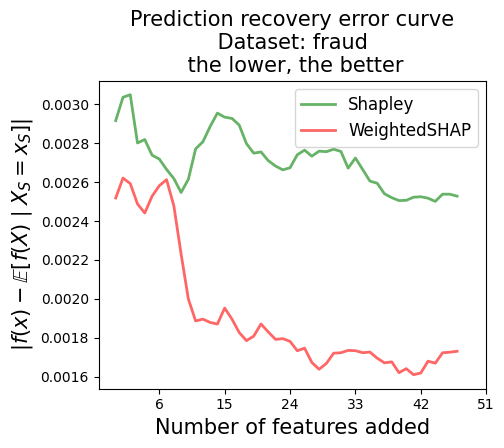

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
n_features=len(recovery_curve_keep_absolute[0])
n_display_features=int(n_features*0.6)

plt.plot(recovery_curve_keep_absolute[0][max(1,int(n_features*0.075)):n_display_features],
         label='Shapley', color='green', linewidth=2, alpha=0.6)
plt.plot(recovery_curve_keep_absolute[1][max(1,int(n_features*0.075)):n_display_features],
         label='WeightedSHAP', color='red', linewidth=2, alpha=0.6)
plt.legend(fontsize=12)
xlabel_text='Number of features added' 
plt.title(f'Prediction recovery error curve\n Dataset: fraud \n the lower, the better', fontsize=15)
plt.xticks(np.arange(n_features)[max(1,int(n_features*0.075)):n_display_features][::n_display_features//6],
               np.arange(n_features)[max(1,int(n_features*0.075)):n_display_features][::n_display_features//6])
plt.xlabel(xlabel_text, fontsize=15)
plt.ylabel(r'$|f(x)-\mathbb{E}[f(X) \mid X_S = x_S]|$', fontsize=15)
    